In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import pickle as pkl
import seaborn as sns

from scipy import stats
from scipy.stats import cumfreq

from tabulate import tabulate
from scipy.stats import f

import os

In [ ]:
os.chdir("/Users/avascharfstein/Desktop/Dartmouth/mds-final")

In [4]:
df = pd.read_csv('data/df_relabeled.csv')
with open('data/specific_stats.pkl', 'rb') as f:
    specific_stats = pkl.load(f)
with open('data/overall_stats.pkl', 'rb') as f:
    overall_stats = pkl.load(f)
with open('data/context_vars.pkl', 'rb') as f:
    context_vars = pkl.load(f)

stats_df = df.drop(columns = context_vars)

In [101]:
def dist_measures(dist):
    mean = np.mean(dist)
    median = np.median(dist)
    std = np.std(dist)
    if std==0:
        skew = 0
    else:
        skew = 3*(mean-median)/std
    return [mean, median, skew, std]

def plt_dist(df, var, xlabel= None):
    m_dist = df[df['men']][var]
    w_dist = df[~df['men']][var]
    [m_mean, m_median, m_skew, m_std] = dist_measures(m_dist)
    [w_mean, w_median, w_skew, w_std] = dist_measures(w_dist)
    metric = "Mean" # default metric is mean
    m_metric = m_mean
    w_metric = w_mean
    #Assume skewness is >0 since there will be no negative values (FOR NOW)
    if m_skew > .5 or w_skew >.5: # if one of the distributions is skewed heavily..
        metric = "Median"
        m_metric = m_median
        w_metric = w_median

    if xlabel is None:
        xlabel = var.replace("_"," ").title()

    sns.histplot(m_dist, alpha=0.6, label='Mens', color='skyblue')  # Replace 'blue' with 'skyblue'
    sns.histplot(w_dist, alpha=0.4, label='Womens', color='orange')  # Replace 'orange' with 'salmon'

    plt.axvline(m_metric, color='skyblue', linestyle='dashed', linewidth=3)
    plt.axvline(w_metric, color='orange', linestyle='dashed', linewidth=3)
    #plt.title("Dashed Line represents " + metric, fontsize=7)
    plt.suptitle("Histogram of " + var.replace("_", " ").title())
    plt.text(0.5, -0.15, f"Dashed Line represents {metric}", horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontdict={'fontsize': 8, 'fontstyle': 'italic'})
    plt.xlabel(xlabel)
    plt.ylabel("Matches")
    plt.legend(loc='upper right')
    plt.show()

    # plt.hist(m_dist, alpha=0.4, label='Mens', color = 'blue') #0d98ba
    # plt.hist(w_dist, alpha=0.4, label='Womens', color = 'orange') #7804b3
    
    # plt.axvline(m_metric, color = 'blue', linestyle='dashed', linewidth=2)
    # plt.axvline(w_metric, color='orange', linestyle='dashed', linewidth=2)
    # plt.title("Dashed Line represents "+metric, fontsize = 7)
    # plt.suptitle("Histogram of " +var.replace("_"," ").title())
    # plt.xlabel(xlabel)
    # plt.ylabel("Matches")
    # plt.legend(loc='upper right')
    # plt.show()

In [6]:
h = "_home"
a = "_away"

In [7]:
specific_stats.remove('rs')
specific_stats.remove('seed')
specific_stats.remove('win')

In [8]:
specific_stats

{'aces',
 'backhand_errors',
 'backhand_unforced_errors',
 'backhand_winners',
 'breakpoints_won',
 'double_faults',
 'drop_shot_unforced_errors',
 'drop_shot_winners',
 'first_serve_points_won',
 'first_serve_successful',
 'forehand_errors',
 'forehand_unforced_errors',
 'forehand_winners',
 'games_won',
 'groundstroke_errors',
 'groundstroke_unforced_errors',
 'groundstroke_winners',
 'lob_unforced_errors',
 'lob_winners',
 'max_games_in_a_row',
 'max_points_in_a_row',
 'overhead_stroke_errors',
 'overhead_stroke_unforced_errors',
 'overhead_stroke_winners',
 'points_won',
 'points_won_from_last_10',
 'return_errors',
 'return_winners',
 'second_serve_points_won',
 'second_serve_successful',
 'service_games_won',
 'service_points_lost',
 'service_points_won',
 'tiebreaks_won',
 'total_breakpoints',
 'volley_unforced_errors',
 'volley_winners'}

In [9]:
features_diff = []
for stat in specific_stats:
    stats_df[stat+"_diff"] = stats_df[stat+h]-stats_df[stat+a] # abs() commented out
    features_diff.append(stat+"_diff")

features_diff.append("avg_set_diff")

for x in [x for x in overall_stats if x not in ['match_length','sets','men']]:
    features_diff.append(x)


In [10]:
# Remove features whose mean and variance < 1
to_remove = []
for feature in specific_stats:
    ms = dist_measures(stats_df[feature+"_diff"])
    ms_h = dist_measures(stats_df[feature+h])
    ms_a = dist_measures(stats_df[feature+a])
    if ms_h[0] < 1 and ms_h[0] < 1 and ms_h[3] < 1 and ms_a[3] <1:
        # print(feature)
        # print(ms_h)
        # print(ms_a)
        # plt_dist(stats, feature+h)
        to_remove.append(feature+"_diff")
        print("Removed "+feature+"_diff")

features_diff = list(set(features_diff) - set(to_remove))

Removed overhead_stroke_unforced_errors_diff
Removed lob_winners_diff
Removed return_winners_diff
Removed return_errors_diff
Removed lob_unforced_errors_diff
Removed drop_shot_unforced_errors_diff
Removed tiebreaks_won_diff
Removed overhead_stroke_errors_diff


In [11]:
features_diff_df = stats_df[features_diff]

In [12]:
features_diff_df

total_breakpoints_diff  breakpoints_won_diff  double_faults_diff  \
0                         4                     1                  -2   
1                         7                     0                   1   
2                         4                     3                   0   
3                         0                    -1                   2   
4                         5                     3                  -2   
..                      ...                   ...                 ...   
940                       6                     4                   4   
941                      -1                     4                  -1   
942                       8                     3                  -2   
943                       2                    -2                 -10   
944                       3                     2                   0   

     max_points_in_a_row_diff  avg_set_games  backhand_errors_diff  \
0                           0      11.500000                     2   
1                          -1      13.000000                     2   
2                           2       9.500000                    -2   
3                          -3      10.666667                   -10   
4                           1      10.000000                    -3   
..                        ...            ...                   ...   
940                        -4       9.666667                    -8   
941                         3       9.000000                    -9   
942                         4      10.000000                    -4   
943                        -3       9.500000                    10   
944                         4      10.333333                     0   

     backhand_unforced_errors_diff  first_serve_successful_diff  \
0                                3                            2   
1                               14                          -19   
2                               10                          -10   
3                                1                           -1   
4                               -3                            0   
..                             ...                          ...   
940                              1                           -3   
941                             -4                            3   
942                             -5                           -6   
943                              4                           11   
944                             -3                          -10   

     avg_set_length  service_games_won_diff  ...  volley_winners_diff  \
0         50.983333                       1  ...                    2   
1         72.141667                       0  ...                    5   
2         50.866667                       2  ...                    2   
3         54.772222                       0  ...                   -4   
4         46.783333                       4  ...                    0   
..              ...                     ...  ...                  ...   
940       55.894444                       3  ...                   -3   
941       50.033333                       5  ...                    6   
942       53.683333                       4  ...                    0   
943       49.737500                      -3  ...                   21   
944       65.744444                       4  ...                   11   

     games_won_diff  avg_set_diff  groundstroke_errors_diff  \
0               3.0      1.500000                         5   
1              -2.0      1.000000                        -5   
2               5.0      2.500000                        -5   
3              -2.0      0.666667                        -8   
4               6.0      2.000000                       -10   
..              ...           ...                       ...   
940             7.0      2.333333                       -20   
941             9.0      3.000000                       -15   
942             8.0     -2.666667     

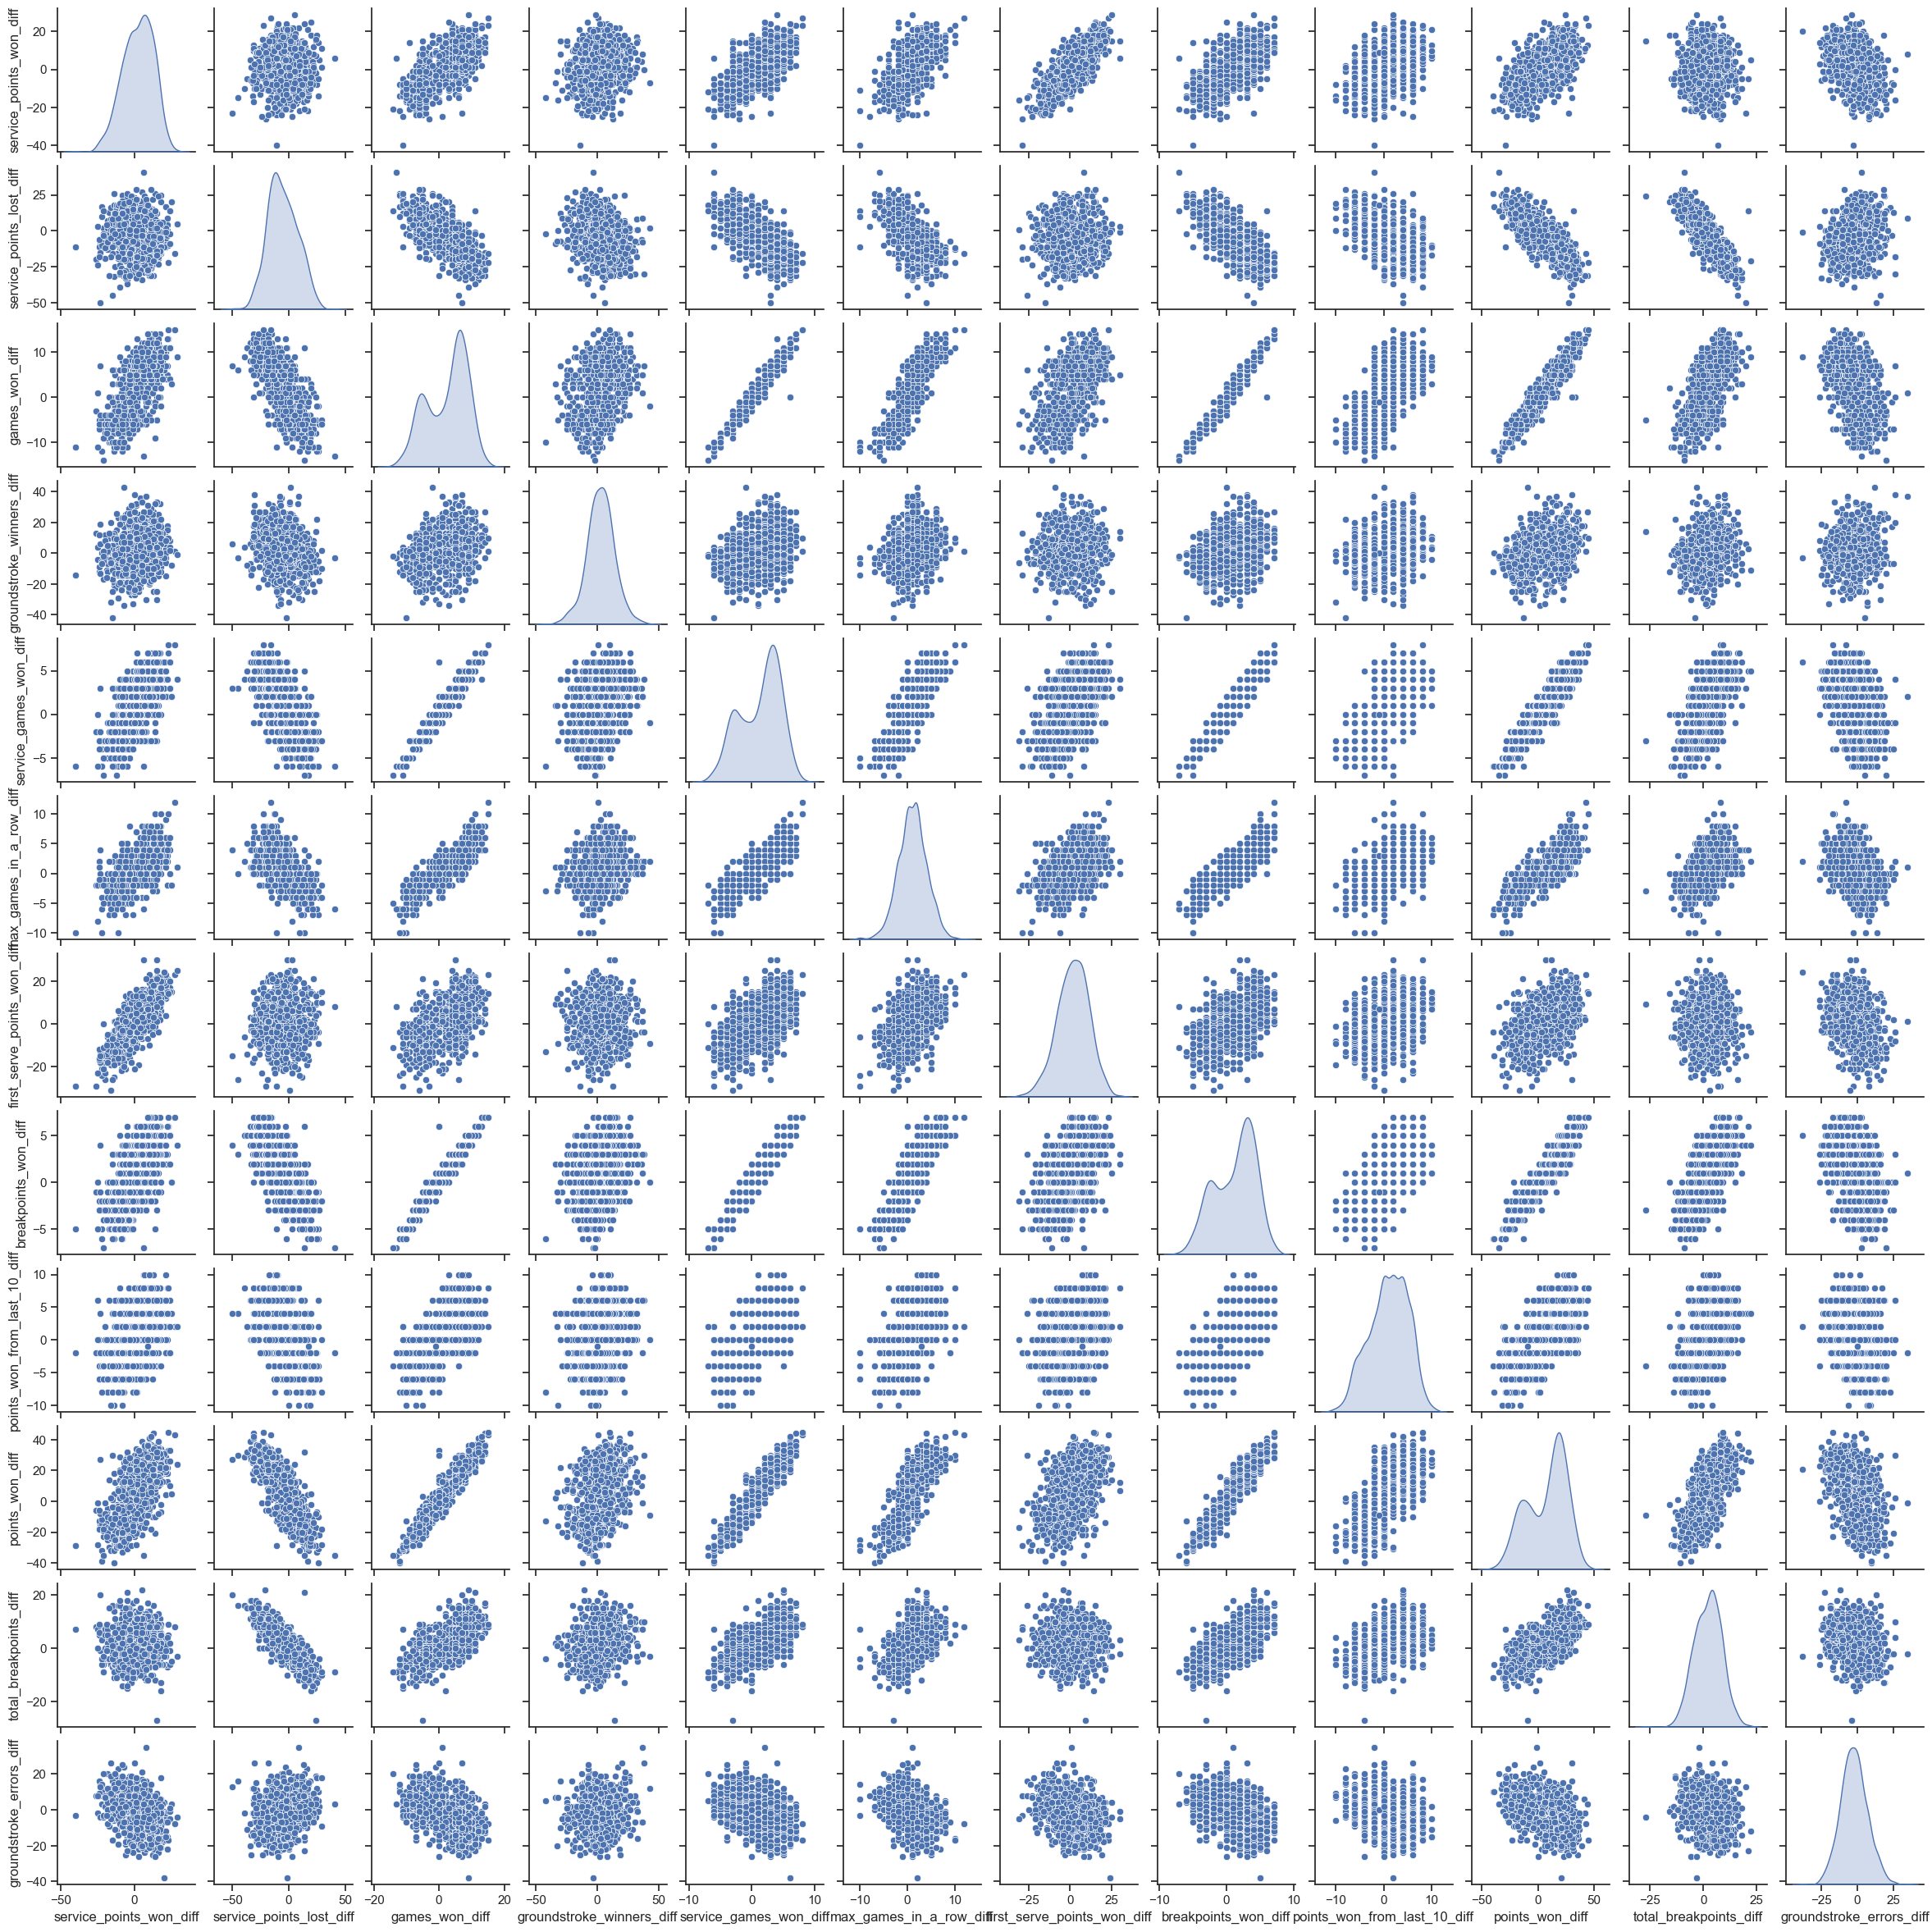

In [13]:
#features_diff_df.columns

# to_try = ['aces_diff','double_faults_diff','points_won_diff','avg_points_per_game','avg_game_length','groundstroke_errors_diff','service_games_won_diff','breakpoints_won_diff','backhand_winners_diff','forehand_winners_diff']
to_try = ['service_points_won_diff',
'service_points_lost_diff',
'games_won_diff',
'groundstroke_winners_diff',
'service_games_won_diff',
'max_games_in_a_row_diff',
'first_serve_points_won_diff',
'breakpoints_won_diff',
'points_won_from_last_10_diff',
'points_won_diff',
'total_breakpoints_diff',
'groundstroke_errors_diff']

sns.set(style="ticks")
sns.pairplot(features_diff_df[to_try], height=2, markers='o', diag_kind='kde')

# Show the plots
plt.show()


In [ ]:
for feature in features_diff:
    plt_dist(stats_df, feature)

In [62]:
def plt_ecdf(df, var, xlabel=None):
    m_dist = df[df['men']][var]
    w_dist = df[~df['men']][var]

    ks = stats.kstest(m_dist, w_dist)

    m_x, m_cf = np.sort(m_dist), np.arange(1, len(m_dist) + 1) / len(m_dist)
    w_x, w_cf = np.sort(w_dist), np.arange(1, len(w_dist) + 1) / len(w_dist)

    if xlabel is None:
        xlabel = var.replace("_", " ").title()

    plt.step(x=m_x, y=m_cf, label='Mens', color='skyblue')
    plt.step(x=w_x, y=w_cf, label='Womens', color='orange')

    plt.title("Empirical CDF of " + var.replace("_", " ").title())
    plt.xlabel(xlabel)
    plt.ylabel("Cumulative Probability")
    plt.legend(loc='lower right')
    # Display KS test statistic and p-value
    plt.text(0.5, -0.15, f"KS Statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}", horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontdict={'fontsize': 8, 'fontstyle': 'italic'})
    
    plt.show()


In [16]:
# for feature in features_diff:
#     plt_ecdf(stats_df, feature)
# print(stat_different)

In [17]:
# print(len(stat_different))
# print(len(features_diff))

In [92]:
def summarize(df, var):
    m_dist = df[df['men']][var]
    w_dist = df[~df['men']][var]
    m_results = stats.describe(m_dist)
    w_results = stats.describe(w_dist)

    summary_data = [
        ["Mean", m_results.mean, w_results.mean],
        ["Variance", m_results.variance, w_results.variance],
        ["Skewness", stats.skew(m_dist), stats.skew(w_dist)],
        ["Kurtosis", stats.kurtosis(m_dist), stats.kurtosis(w_dist)],
    ]

    significant = []

    # KS-Test for distributions
    ks_stat, ks_p_value = stats.kstest(m_dist, w_dist)
    if ks_p_value <.05:
        significant.append("KS-Test")

    # T-test for means
    t_stat, t_p_value = stats.ttest_ind(m_dist, w_dist)
    if t_p_value < .05:
        significant.append("T-test")

    # Mann-Whitney U test (non-parametric test for comparing distributions)
    u_stat, mw_p_value = stats.mannwhitneyu(m_dist, w_dist)
    if mw_p_value < .05:
        significant.append("Mann-Whitney U")

    # F-test for variances
    f_stat, f_p_value = stats.levene(m_dist, w_dist)
    if f_p_value < .05:
        significant.append("Levene")

    # Results table
    results_table = [
        ["KS-test (Distribution)", ks_stat, ks_p_value],
        ["T-test (Means)", t_stat, t_p_value],
        ["Mann-Whitney U", u_stat, mw_p_value],
        ["Levene-test (Variances)", f_stat, f_p_value],
    ]
    
    var_format = var.replace("_"," ")
    # Print the tables
    print(f"Summary Statistics for {var_format.title()}:")
    print(tabulate(summary_data, headers=["Statistic", "Men", "Women"], tablefmt="grid"))
    print(f"Statistical Tests for {var_format.title()}:")
    print(tabulate(results_table, headers=["Test", "Statistic", "P-value"], tablefmt="grid"))
    print("Tests that are statistically significant:"+str(significant))
    print('\n\n')

import statsmodels.api as sm

def plt_qq(df, var, name):
    m_dist = df[df['men']][var]
    w_dist = df[~df['men']][var]

    #sns.set_palette(sns.color_palette(['skyblue', 'orange']))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    stats.probplot(m_dist, plot=axes[0])
    axes[0].set_title('Mens')
    axes[0].get_lines()[0].set_markeredgecolor('none')
    axes[0].get_lines()[0].set_markerfacecolor('skyblue')  # Set color for Men's QQ plot
    axes[0].get_lines()[1].set_color('black')  # Set color for the line


    stats.probplot(w_dist, plot=axes[1])
    axes[1].set_title('Womens')
    axes[1].get_lines()[0].set_markeredgecolor('none')
    axes[1].get_lines()[0].set_markerfacecolor('orange')  # Set color for Women's QQ plot
    axes[1].get_lines()[1].set_color('black')


    fig.suptitle(name)
    plt.show();

    # fig.suptitle(name)
    # plt.show();

Summary Statistics for Aces Diff:
+-------------+-----------+------------+
| Statistic   |       Men |      Women |
+=============+===========+============+
| Mean        |  1.10145  |  0.84632   |
+-------------+-----------+------------+
| Variance    | 55.1992   | 10.5382    |
+-------------+-----------+------------+
| Skewness    | -0.326073 | -0.0141908 |
+-------------+-----------+------------+
| Kurtosis    |  1.49348  |  1.59613   |
+-------------+-----------+------------+
Statistical Tests for Aces Diff:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.171372 | 1.54266e-06 |
+-------------------------+---------------+-------------+
| T-test (Means)          |      0.678713 | 0.497486    |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 115984        | 0.291632    |
+-----------------

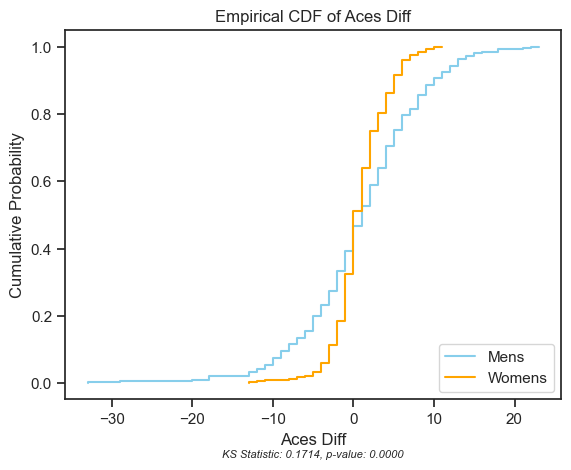

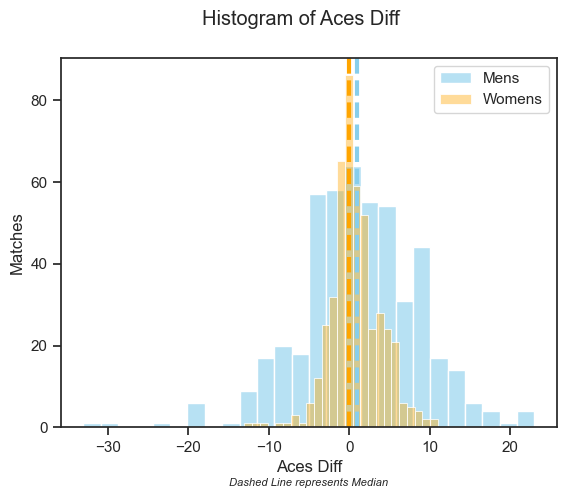

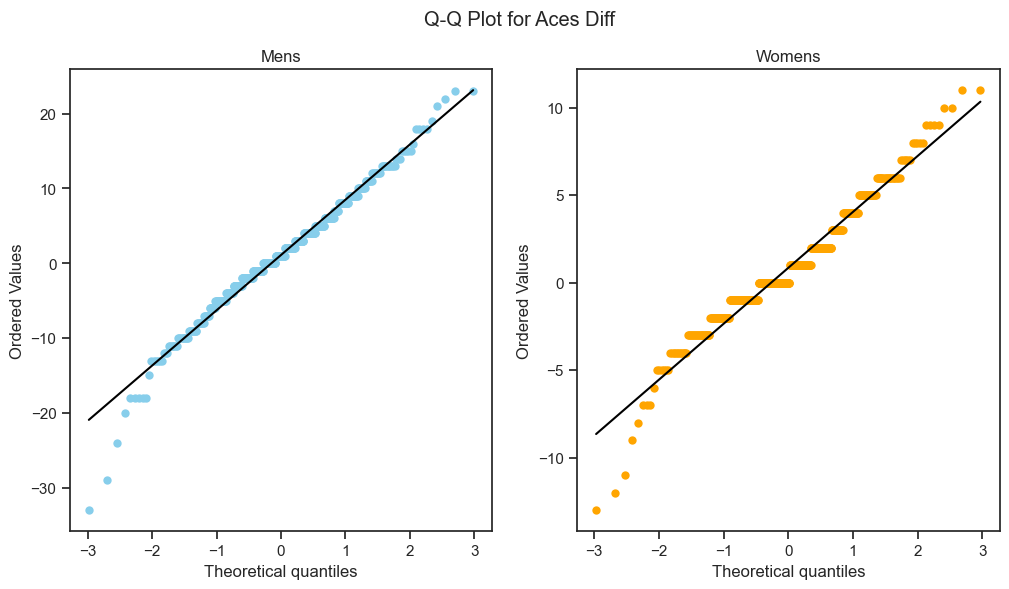

Summary Statistics for Avg Game Length:
+-------------+------------+----------+
| Statistic   |        Men |    Women |
+=============+============+==========+
| Mean        |  4.6178    | 4.74881  |
+-------------+------------+----------+
| Variance    |  0.328538  | 0.414392 |
+-------------+------------+----------+
| Skewness    |  0.257596  | 0.42051  |
+-------------+------------+----------+
| Kurtosis    | -0.0342572 | 0.383443 |
+-------------+------------+----------+
Statistical Tests for Avg Game Length:
+-------------------------+--------------+-------------+
| Test                    |    Statistic |     P-value |
+=========================+==============+=============+
| KS-test (Distribution)  |     0.105778 | 0.00919852  |
+-------------------------+--------------+-------------+
| T-test (Means)          |    -3.30729  | 0.000977622 |
+-------------------------+--------------+-------------+
| Mann-Whitney U          | 98829        | 0.0023787   |
+------------------------

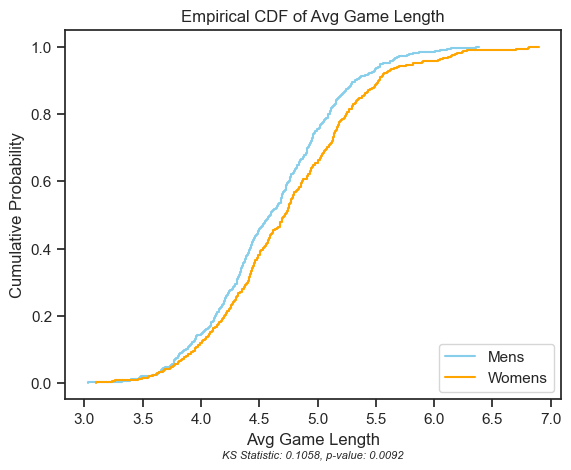

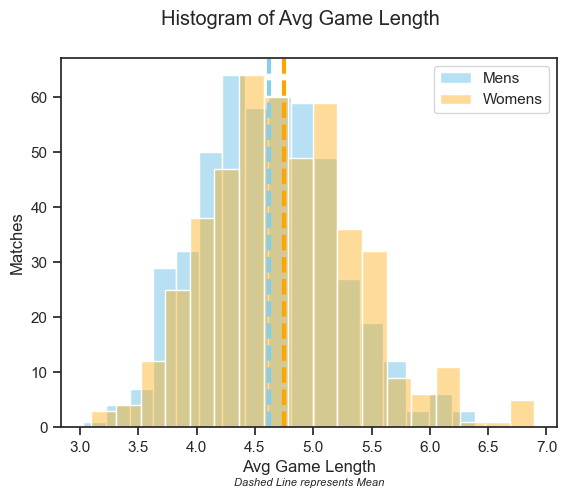

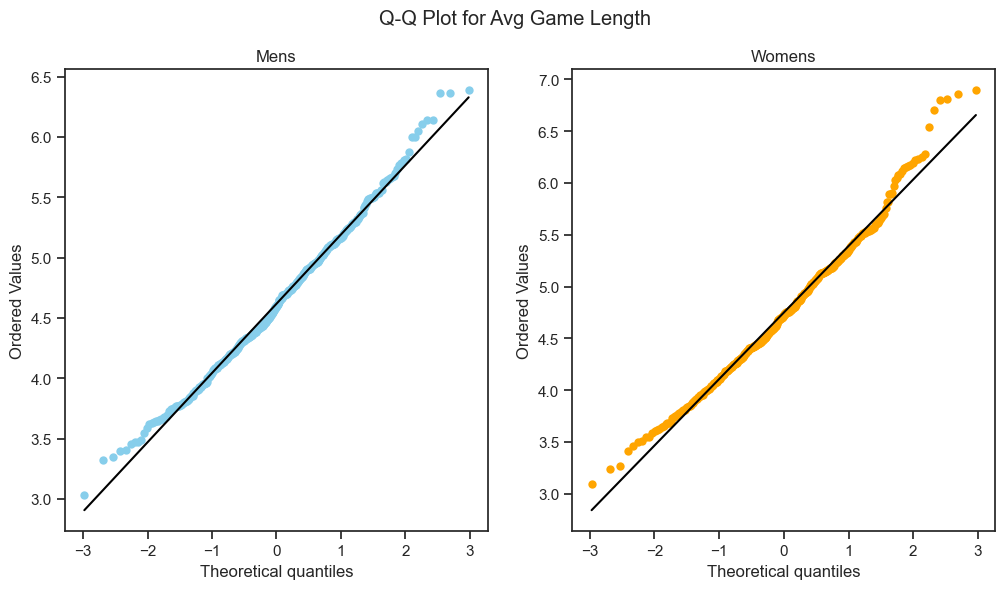

Summary Statistics for Avg Points Per Game:
+-------------+----------+----------+
| Statistic   |      Men |    Women |
+=============+==========+==========+
| Mean        | 6.31197  | 6.55563  |
+-------------+----------+----------+
| Variance    | 0.222113 | 0.367988 |
+-------------+----------+----------+
| Skewness    | 0.70404  | 0.333225 |
+-------------+----------+----------+
| Kurtosis    | 1.17176  | 0.387261 |
+-------------+----------+----------+
Statistical Tests for Avg Points Per Game:
+-------------------------+--------------+-------------+
| Test                    |    Statistic |     P-value |
+=========================+==============+=============+
| KS-test (Distribution)  |     0.230284 | 1.77399e-11 |
+-------------------------+--------------+-------------+
| T-test (Means)          |    -6.91228  | 8.77739e-12 |
+-------------------------+--------------+-------------+
| Mann-Whitney U          | 82233.5      | 2.64842e-12 |
+-------------------------+------------

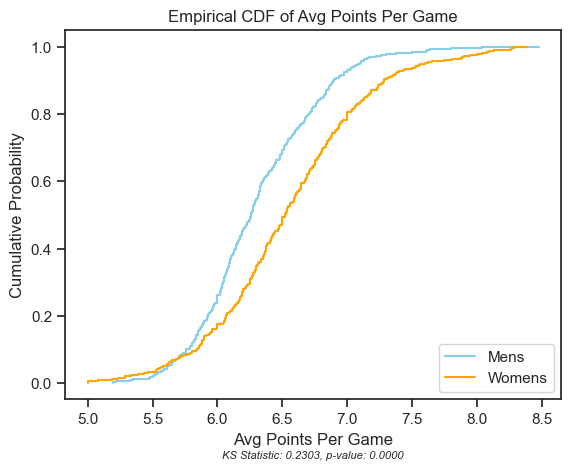

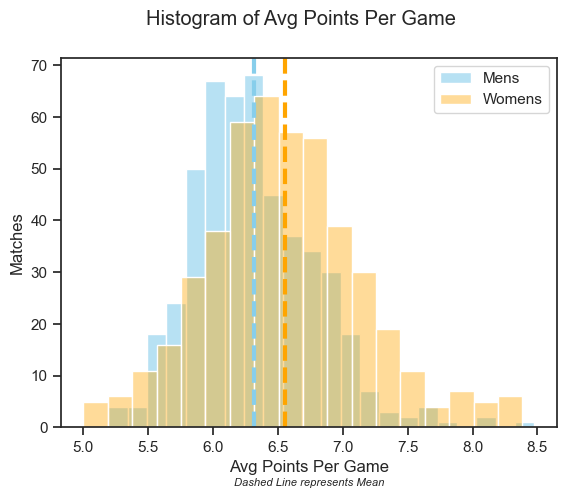

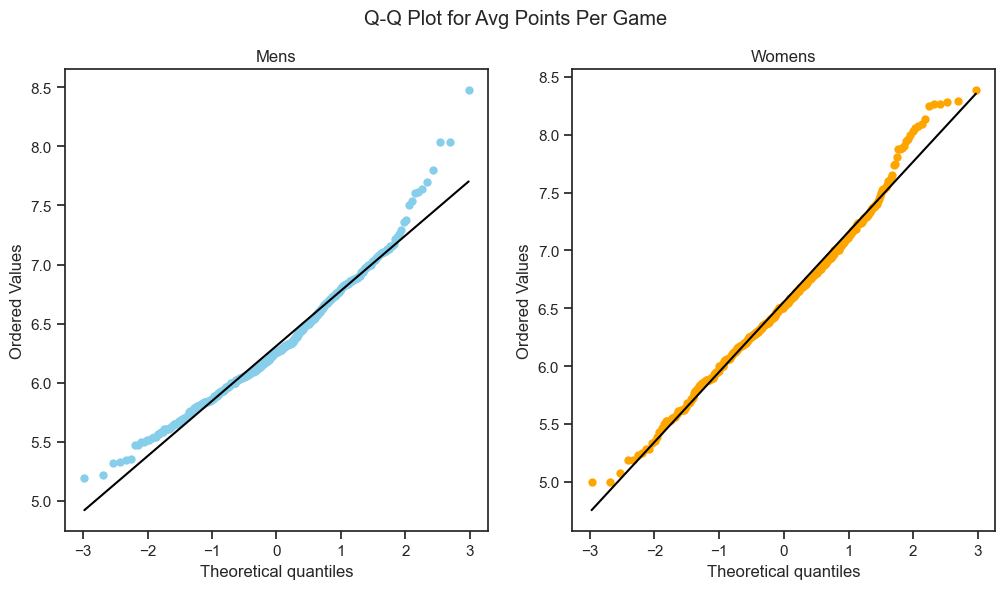

Summary Statistics for Avg Set Diff:
+-------------+------------+------------+
| Statistic   |        Men |      Women |
+=============+============+============+
| Mean        |  0.0198413 | -0.0753968 |
+-------------+------------+------------+
| Variance    |  5.00272   |  8.3524    |
+-------------+------------+------------+
| Skewness    | -0.023032  |  0.0779285 |
+-------------+------------+------------+
| Kurtosis    | -0.935462  | -1.13928   |
+-------------+------------+------------+
Statistical Tests for Avg Set Diff:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.14728  | 6.08217e-05 |
+-------------------------+---------------+-------------+
| T-test (Means)          |      0.567933 | 0.570216    |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 114705        | 0.455141    |
+

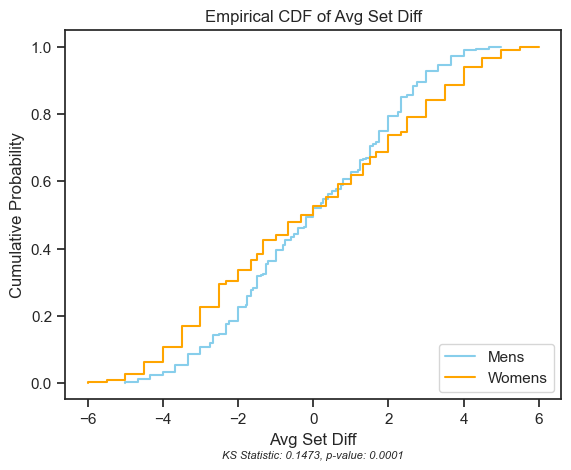

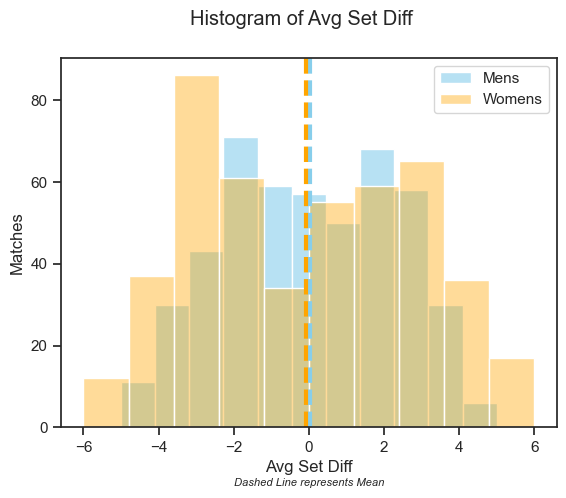

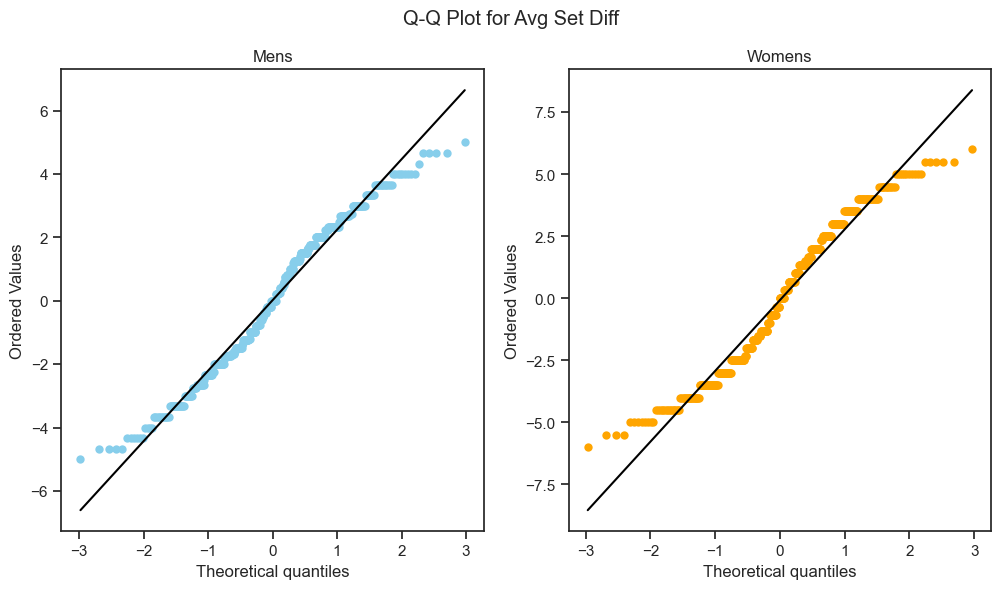

Summary Statistics for Avg Set Games:
+-------------+------------+-----------+
| Statistic   |        Men |     Women |
+=============+============+===========+
| Mean        |  9.70914   |  9.15476  |
+-------------+------------+-----------+
| Variance    |  1.17076   |  1.76263  |
+-------------+------------+-----------+
| Skewness    |  0.0133711 |  0.31314  |
+-------------+------------+-----------+
| Kurtosis    | -0.215308  | -0.128478 |
+-------------+------------+-----------+
Statistical Tests for Avg Set Games:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.248635 | 2.54311e-13 |
+-------------------------+---------------+-------------+
| T-test (Means)          |      7.05011  | 3.45299e-12 |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 141361        | 1.14197e-12 |
+---------

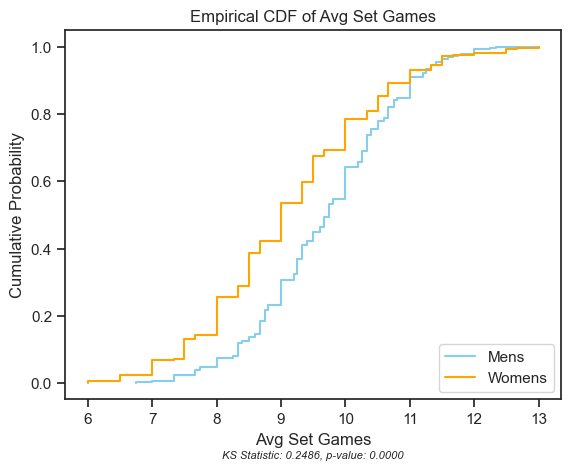

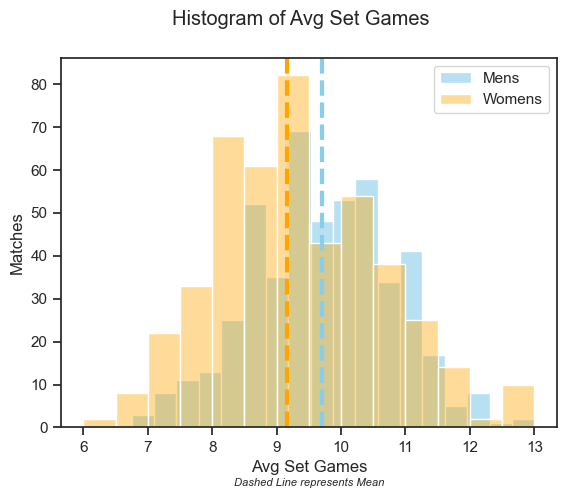

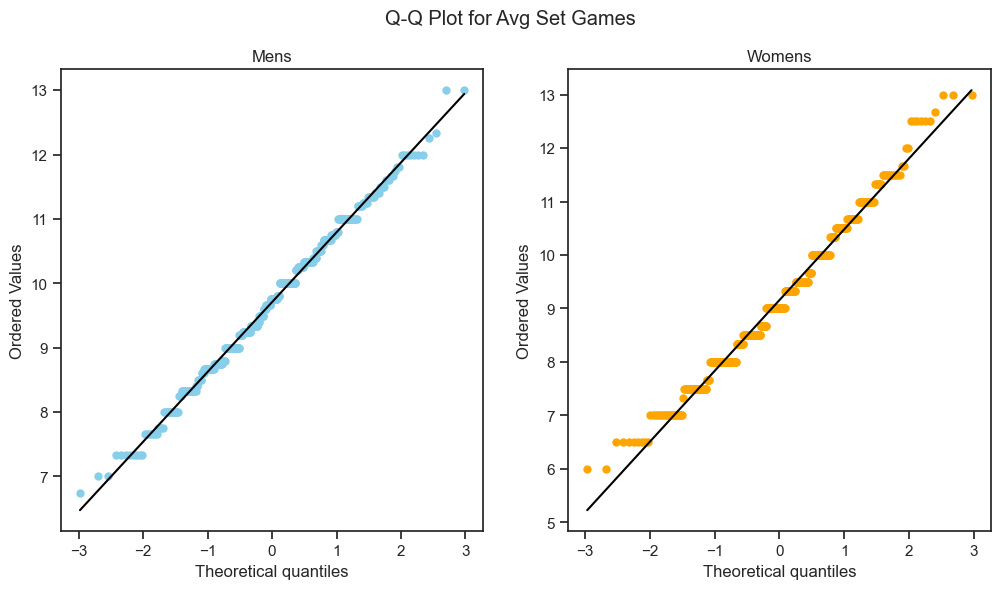

Summary Statistics for Avg Set Length:
+-------------+-----------+-----------+
| Statistic   |       Men |     Women |
+=============+===========+===========+
| Mean        | 44.8134   | 43.6735   |
+-------------+-----------+-----------+
| Variance    | 55.7151   | 97.3383   |
+-------------+-----------+-----------+
| Skewness    |  0.258821 |  0.620146 |
+-------------+-----------+-----------+
| Kurtosis    |  0.110722 |  0.440302 |
+-------------+-----------+-----------+
Statistical Tests for Avg Set Length:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.159797 | 9.67076e-06 |
+-------------------------+---------------+-------------+
| T-test (Means)          |      2.00843  | 0.044882    |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 123925        | 0.00323061  |
+------------------

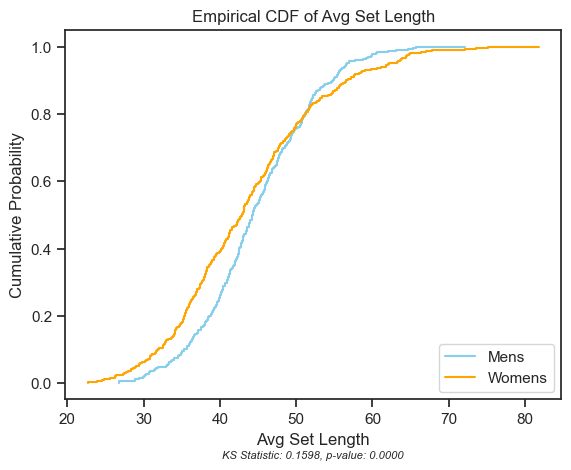

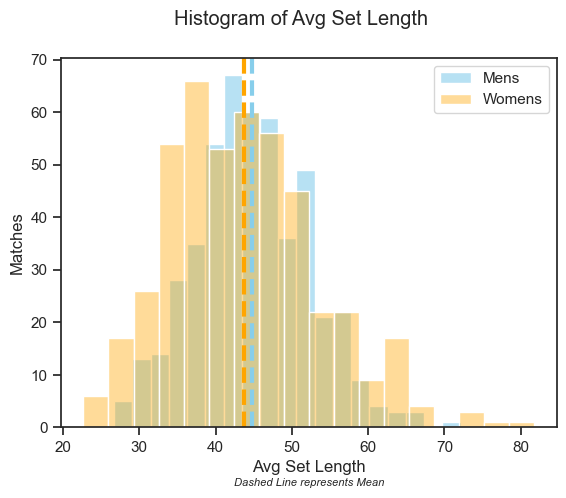

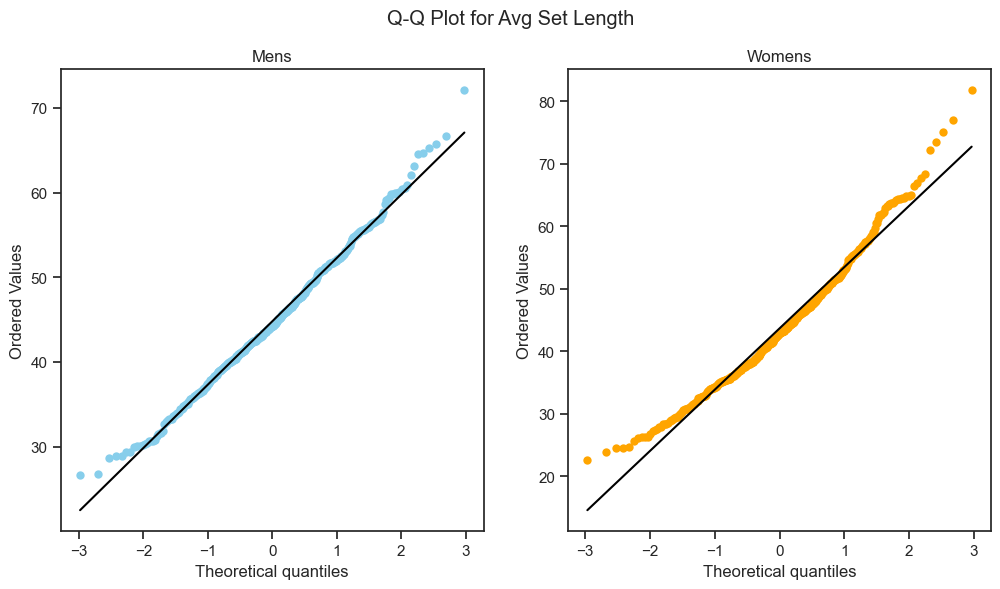

Summary Statistics for Backhand Errors Diff:
+-------------+-----------+-------------+
| Statistic   |       Men |       Women |
+=============+===========+=============+
| Mean        | -0.910973 | -1.2987     |
+-------------+-----------+-------------+
| Variance    | 56.0937   | 26.4529     |
+-------------+-----------+-------------+
| Skewness    |  0.195631 | -6.2218e-05 |
+-------------+-----------+-------------+
| Kurtosis    |  0.470057 |  0.904775   |
+-------------+-----------+-------------+
Statistical Tests for Backhand Errors Diff:
+-------------------------+---------------+------------+
| Test                    |     Statistic |    P-value |
+=========================+===============+============+
| KS-test (Distribution)  |      0.107284 | 0.00789151 |
+-------------------------+---------------+------------+
| T-test (Means)          |      0.923723 | 0.355867   |
+-------------------------+---------------+------------+
| Mann-Whitney U          | 113234        | 0.6917

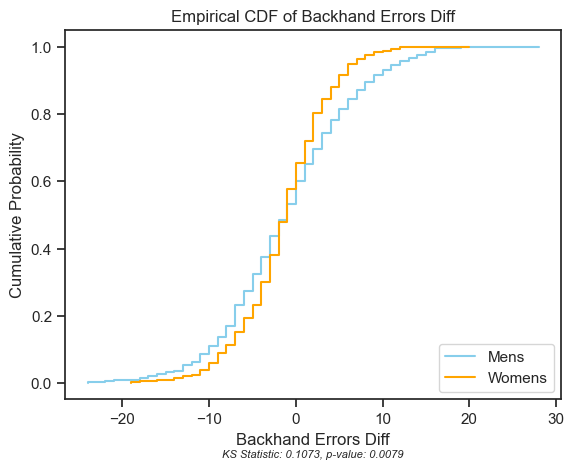

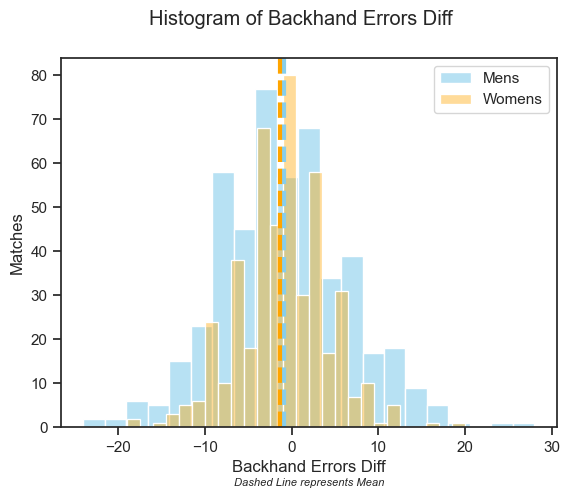

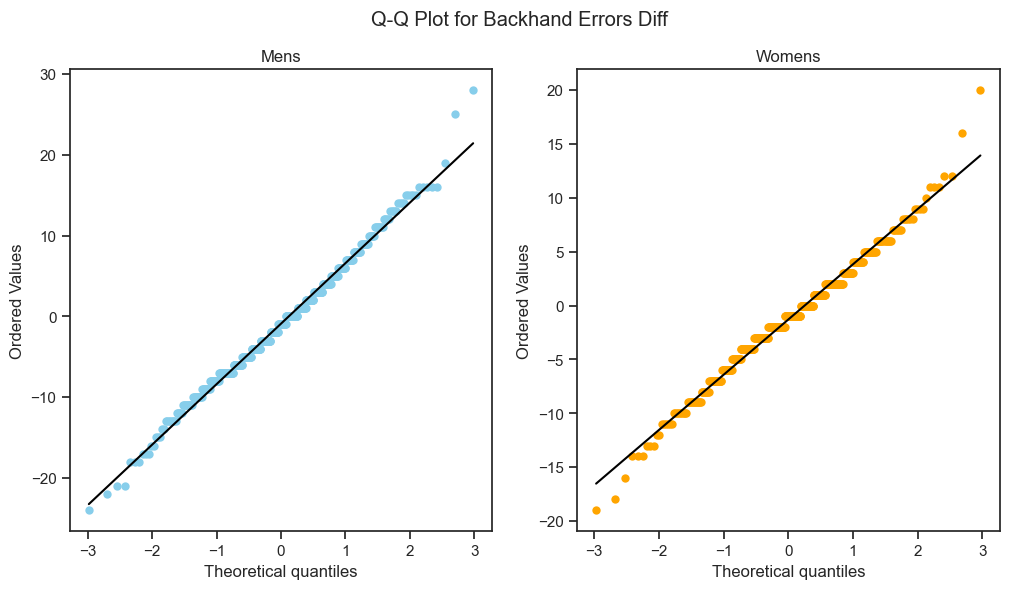

Summary Statistics for Backhand Unforced Errors Diff:
+-------------+------------+------------+
| Statistic   |        Men |      Women |
+=============+============+============+
| Mean        | -0.904762  |  0.0519481 |
+-------------+------------+------------+
| Variance    | 58.1984    | 52.9995    |
+-------------+------------+------------+
| Skewness    |  0.0412523 |  0.0649497 |
+-------------+------------+------------+
| Kurtosis    |  0.991686  |  0.231223  |
+-------------+------------+------------+
Statistical Tests for Backhand Unforced Errors Diff:
+-------------------------+----------------+-----------+
| Test                    |      Statistic |   P-value |
+=========================+================+===========+
| KS-test (Distribution)  |      0.0887446 | 0.0448004 |
+-------------------------+----------------+-----------+
| T-test (Means)          |     -1.97061   | 0.0490611 |
+-------------------------+----------------+-----------+
| Mann-Whitney U          | 1030

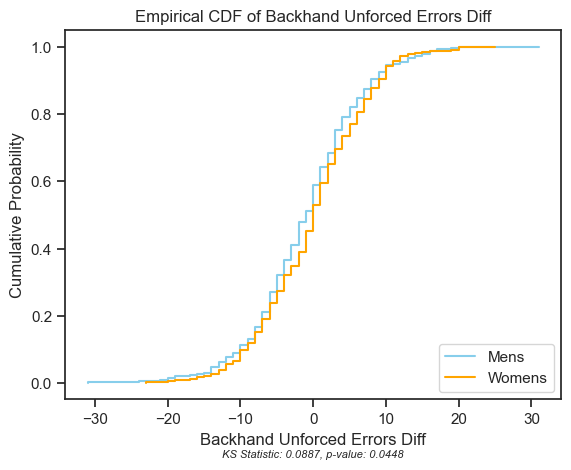

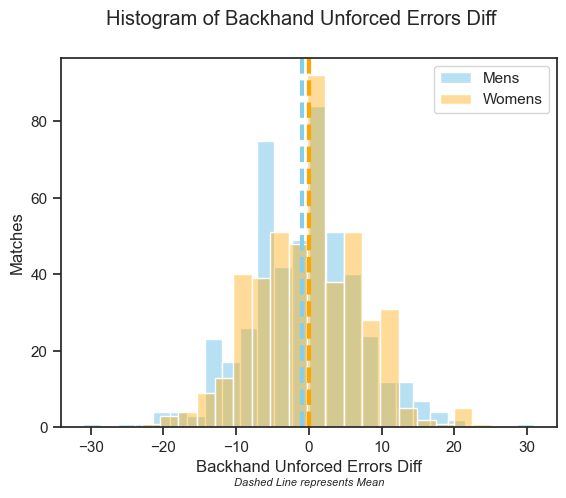

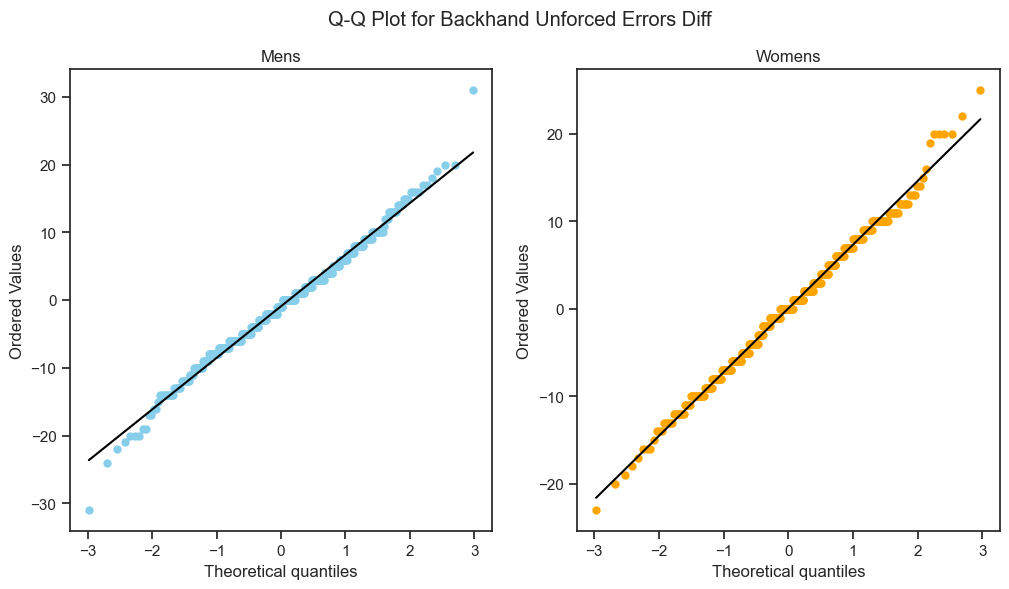

Summary Statistics for Backhand Winners Diff:
+-------------+-----------+------------+
| Statistic   |       Men |      Women |
+=============+===========+============+
| Mean        |  0.478261 |  1.12121   |
+-------------+-----------+------------+
| Variance    | 28.9679   | 22.9874    |
+-------------+-----------+------------+
| Skewness    | -0.17321  | -0.0540328 |
+-------------+-----------+------------+
| Kurtosis    |  0.303366 |  0.375376  |
+-------------+-----------+------------+
Statistical Tests for Backhand Winners Diff:
+-------------------------+----------------+-----------+
| Test                    |      Statistic |   P-value |
+=========================+================+===========+
| KS-test (Distribution)  |      0.0702052 | 0.183275  |
+-------------------------+----------------+-----------+
| T-test (Means)          |     -1.93598   | 0.0531688 |
+-------------------------+----------------+-----------+
| Mann-Whitney U          | 104530         | 0.0925064 |
+-

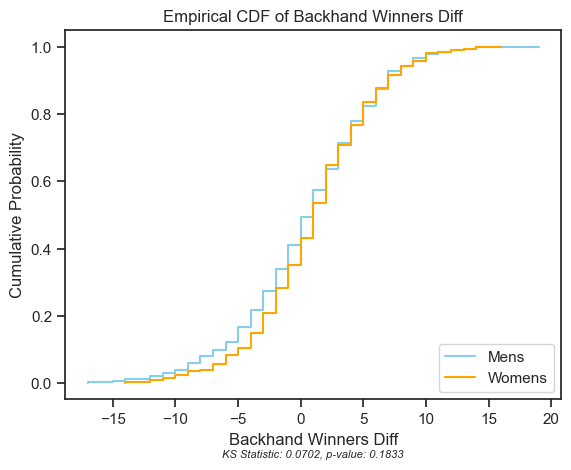

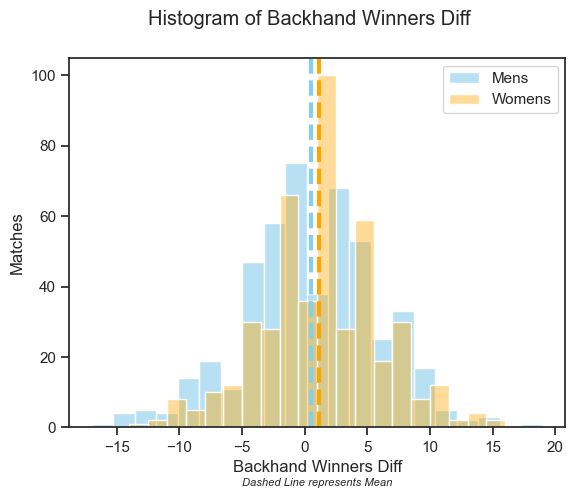

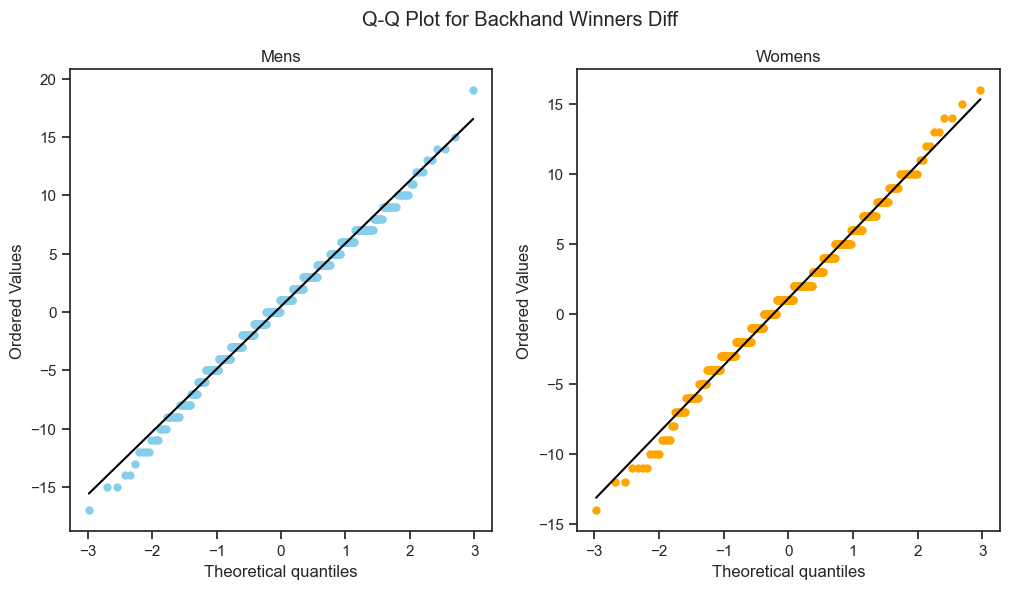

Summary Statistics for Breakpoints Won Diff:
+-------------+-----------+-----------+
| Statistic   |       Men |     Women |
+=============+===========+===========+
| Mean        |  1.38302  |  1.03896  |
+-------------+-----------+-----------+
| Variance    | 10.2742   |  7.57332  |
+-------------+-----------+-----------+
| Skewness    | -0.452202 | -0.377608 |
+-------------+-----------+-----------+
| Kurtosis    | -0.71765  | -1.00493  |
+-------------+-----------+-----------+
Statistical Tests for Breakpoints Won Diff:
+-------------------------+---------------+------------+
| Test                    |     Statistic |    P-value |
+=========================+===============+============+
| KS-test (Distribution)  |      0.098626 | 0.0184945  |
+-------------------------+---------------+------------+
| T-test (Means)          |      1.7669   | 0.077569   |
+-------------------------+---------------+------------+
| Mann-Whitney U          | 121002        | 0.0237093  |
+--------------

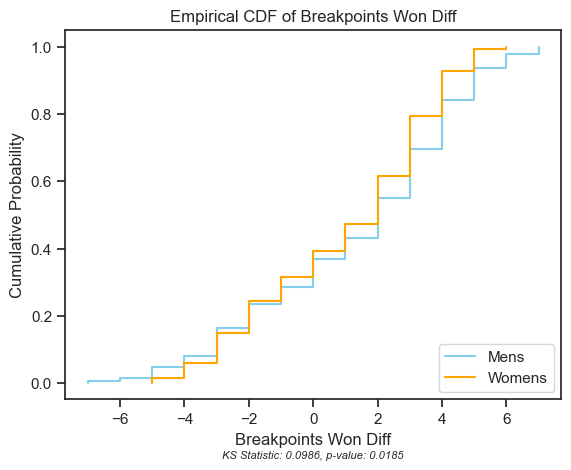

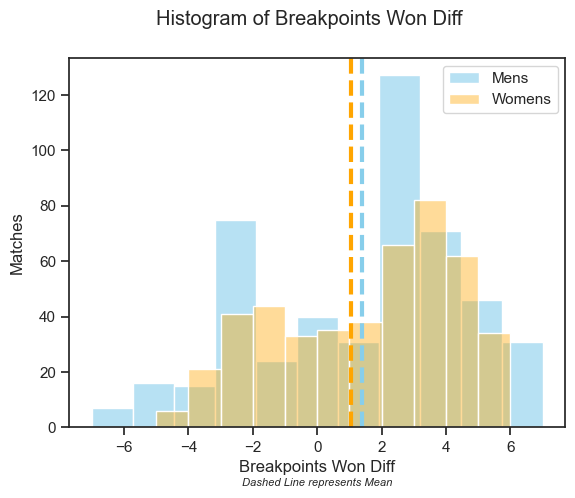

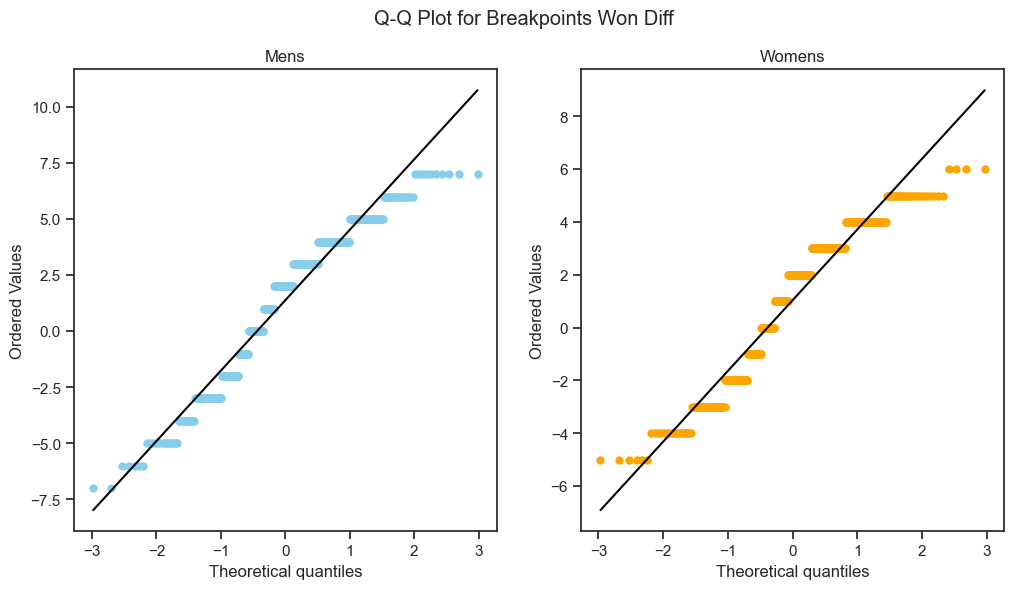

Summary Statistics for Double Faults Diff:
+-------------+-----------+------------+
| Statistic   |       Men |      Women |
+=============+===========+============+
| Mean        | -0.505176 |  0.0714286 |
+-------------+-----------+------------+
| Variance    | 14.7484   | 10.4439    |
+-------------+-----------+------------+
| Skewness    |  0.284093 |  0.285094  |
+-------------+-----------+------------+
| Kurtosis    |  1.37189  |  0.72345   |
+-------------+-----------+------------+
Statistical Tests for Double Faults Diff:
+-------------------------+----------------+------------+
| Test                    |      Statistic |    P-value |
+=========================+================+============+
| KS-test (Distribution)  |      0.0851685 | 0.0603104  |
+-------------------------+----------------+------------+
| T-test (Means)          |     -2.4918    | 0.0128807  |
+-------------------------+----------------+------------+
| Mann-Whitney U          | 100587         | 0.00850629 |


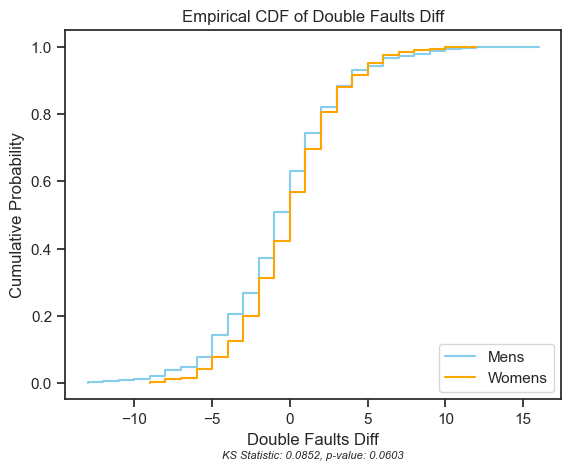

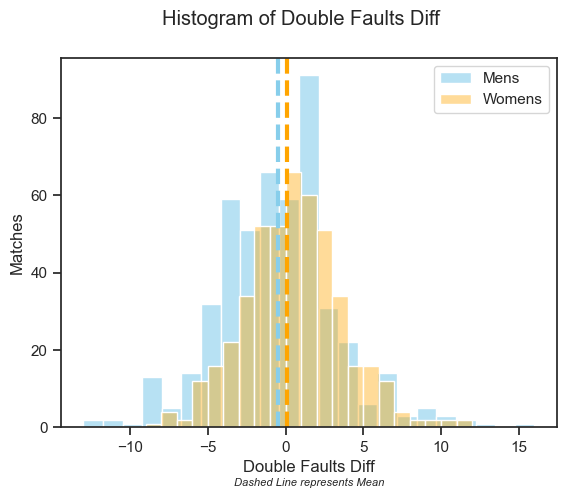

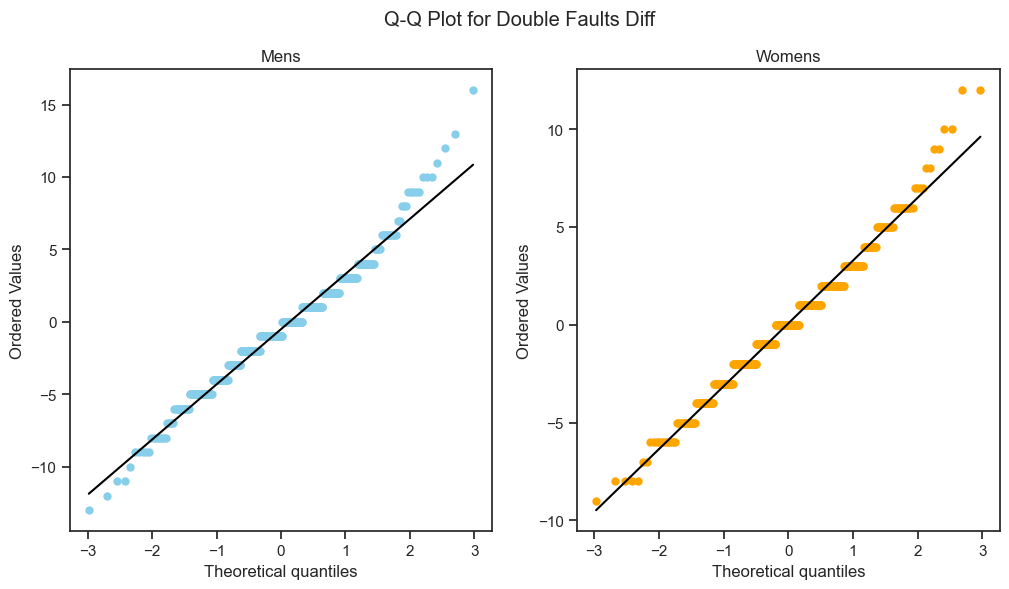

Summary Statistics for Drop Shot Winners Diff:
+-------------+-----------+-----------+
| Statistic   |       Men |     Women |
+=============+===========+===========+
| Mean        |  0.101449 |  0.030303 |
+-------------+-----------+-----------+
| Variance    |  1.80504  |  0.949188 |
+-------------+-----------+-----------+
| Skewness    |  1.62861  |  3.53223  |
+-------------+-----------+-----------+
| Kurtosis    | 22.9813   | 35.4547   |
+-------------+-----------+-----------+
Statistical Tests for Drop Shot Winners Diff:
+-------------------------+----------------+-----------+
| Test                    |      Statistic |   P-value |
+=========================+================+===========+
| KS-test (Distribution)  |      0.0494071 | 0.588318  |
+-------------------------+----------------+-----------+
| T-test (Means)          |      0.928428  | 0.353423  |
+-------------------------+----------------+-----------+
| Mann-Whitney U          | 115576         | 0.203878  |
+----------

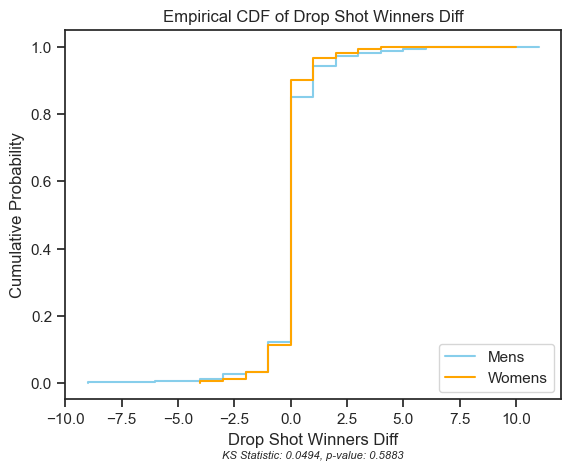

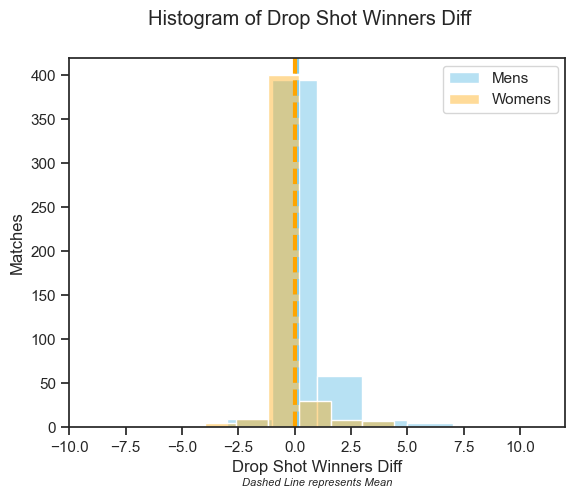

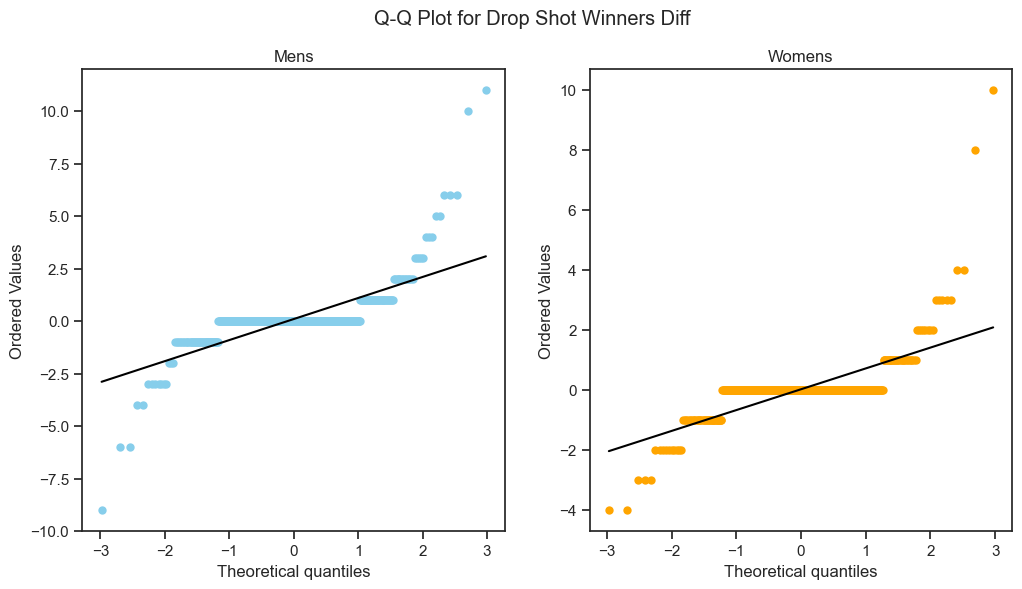

Summary Statistics for First Serve Points Won Diff:
+-------------+------------+-----------+
| Statistic   |        Men |     Women |
+=============+============+===========+
| Mean        |   1.82816  |  1.40693  |
+-------------+------------+-----------+
| Variance    | 109.815    | 73.0488   |
+-------------+------------+-----------+
| Skewness    |  -0.209405 | -0.324483 |
+-------------+------------+-----------+
| Kurtosis    |  -0.12666  |  0.150089 |
+-------------+------------+-----------+
Statistical Tests for First Serve Points Won Diff:
+-------------------------+----------------+-------------+
| Test                    |      Statistic |     P-value |
+=========================+================+=============+
| KS-test (Distribution)  |      0.0907209 | 0.037815    |
+-------------------------+----------------+-------------+
| T-test (Means)          |      0.67543   | 0.499568    |
+-------------------------+----------------+-------------+
| Mann-Whitney U          | 11492

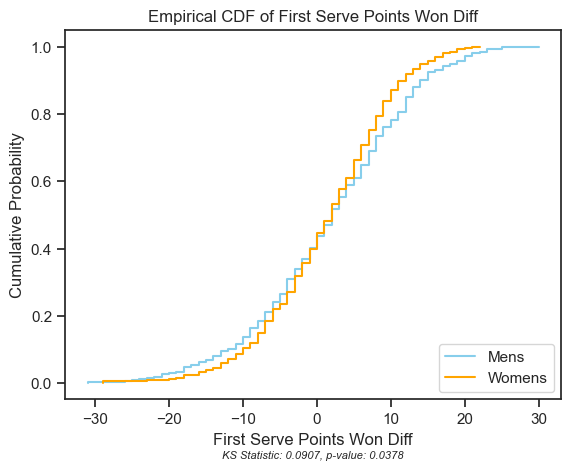

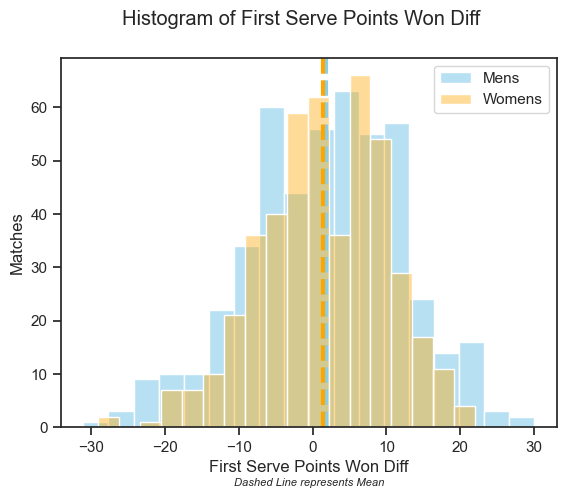

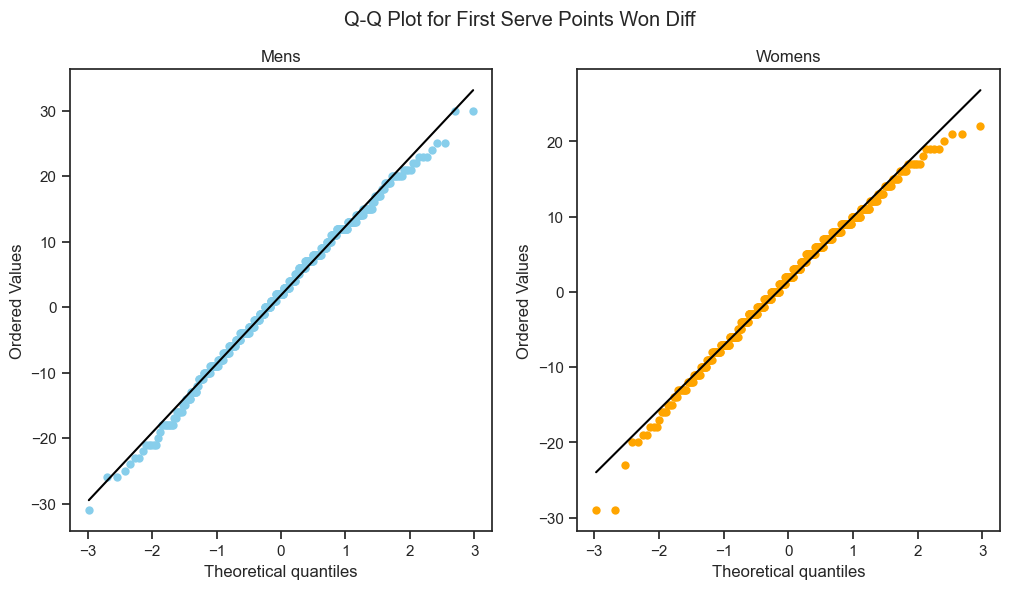

Summary Statistics for First Serve Successful Diff:
+-------------+-------------+------------+
| Statistic   |         Men |      Women |
+=============+=============+============+
| Mean        |  -2.03313   |  -1.46753  |
+-------------+-------------+------------+
| Variance    | 220.198     | 133.525    |
+-------------+-------------+------------+
| Skewness    |  -0.0743792 |  -0.287526 |
+-------------+-------------+------------+
| Kurtosis    |   0.247254  |   1.51652  |
+-------------+-------------+------------+
Statistical Tests for First Serve Successful Diff:
+-------------------------+----------------+------------+
| Test                    |      Statistic |    P-value |
+=========================+================+============+
| KS-test (Distribution)  |      0.0896857 | 0.0413454  |
+-------------------------+----------------+------------+
| T-test (Means)          |     -0.651756  | 0.514717   |
+-------------------------+----------------+------------+
| Mann-Whitney U  

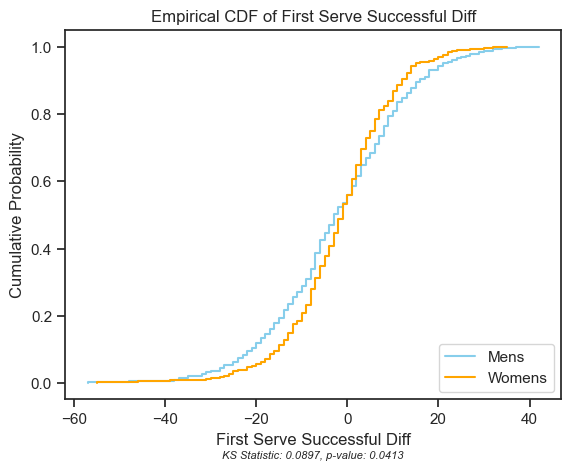

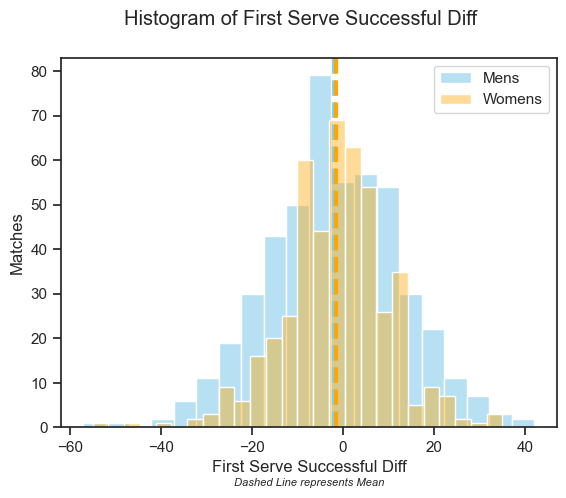

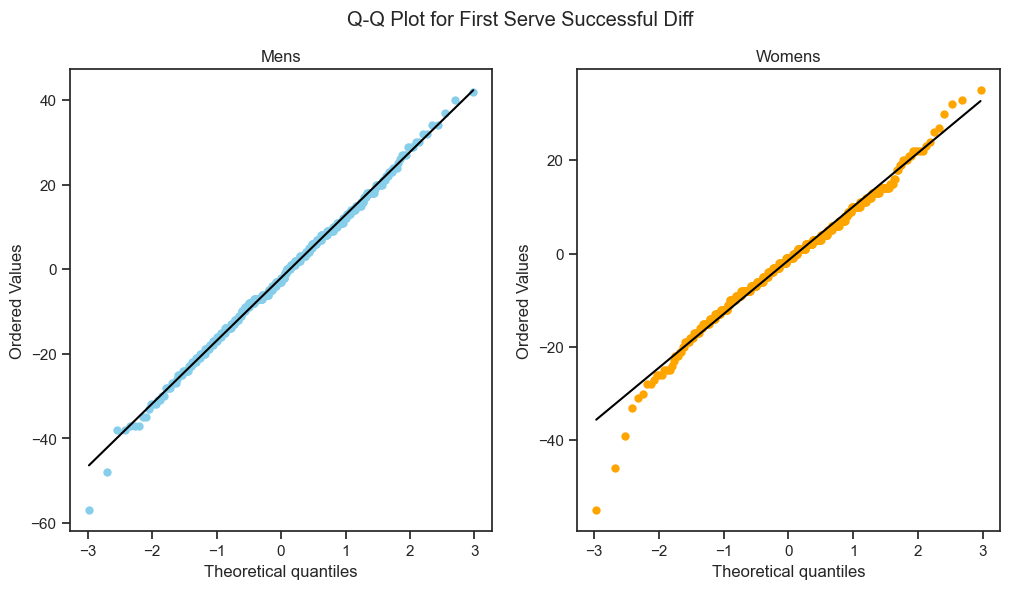

Summary Statistics for Forehand Errors Diff:
+-------------+------------+-----------+
| Statistic   |        Men |     Women |
+=============+============+===========+
| Mean        | -1.706     | -0.880952 |
+-------------+------------+-----------+
| Variance    | 56.1333    | 31.3632   |
+-------------+------------+-----------+
| Skewness    |  0.14573   |  0.239782 |
+-------------+------------+-----------+
| Kurtosis    | -0.0573907 | -0.156875 |
+-------------+------------+-----------+
Statistical Tests for Forehand Errors Diff:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.132505 | 0.000438854 |
+-------------------------+---------------+-------------+
| T-test (Means)          |     -1.9108   | 0.0563336   |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 103410        | 0.0513915 

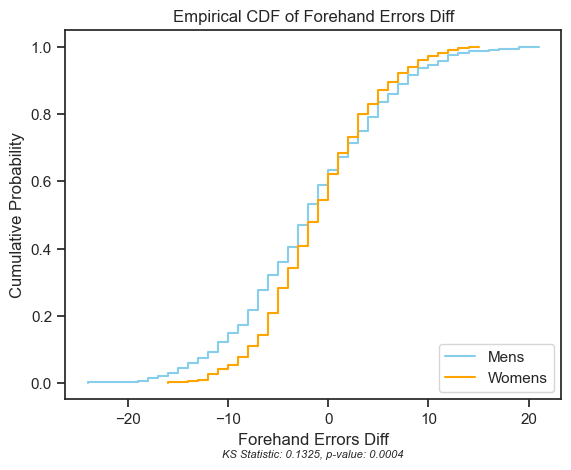

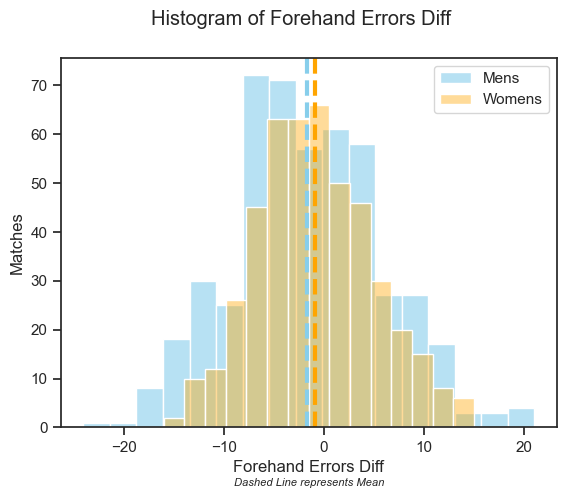

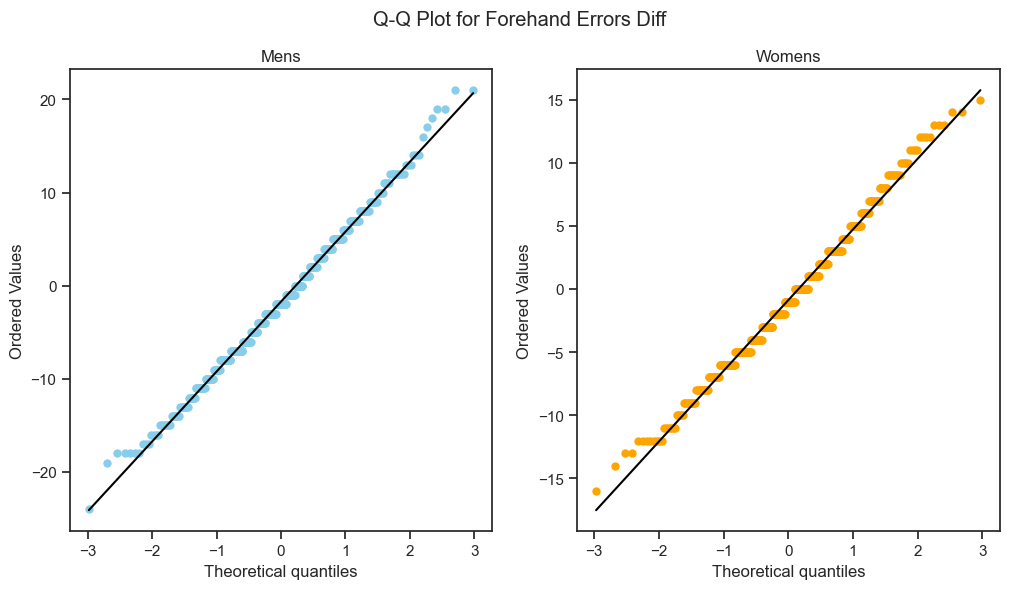

Summary Statistics for Forehand Unforced Errors Diff:
+-------------+-------------+-----------+
| Statistic   |         Men |     Women |
+=============+=============+===========+
| Mean        |  -1.59834   |  1.03463  |
+-------------+-------------+-----------+
| Variance    | 102.087     | 80.476    |
+-------------+-------------+-----------+
| Skewness    |  -0.13784   |  0.140848 |
+-------------+-------------+-----------+
| Kurtosis    |   0.0297566 |  0.778395 |
+-------------+-------------+-----------+
Statistical Tests for Forehand Unforced Errors Diff:
+-------------------------+-------------+-------------+
| Test                    |   Statistic |     P-value |
+=========================+=============+=============+
| KS-test (Distribution)  |     0.13627 | 0.000270592 |
+-------------------------+-------------+-------------+
| T-test (Means)          |    -4.22924 | 2.57331e-05 |
+-------------------------+-------------+-------------+
| Mann-Whitney U          | 95361.5    

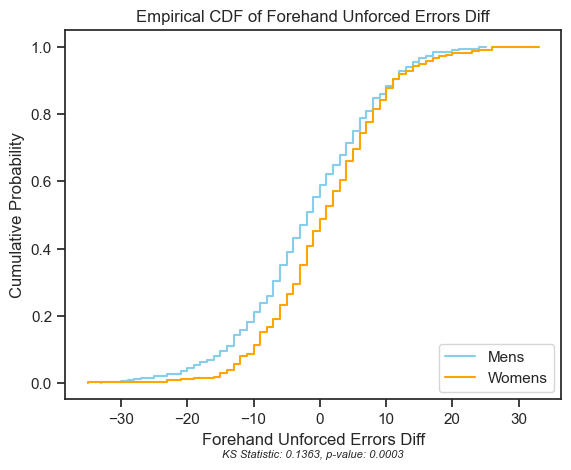

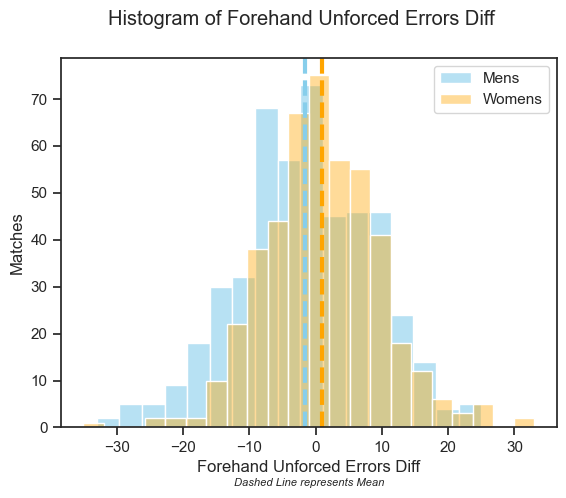

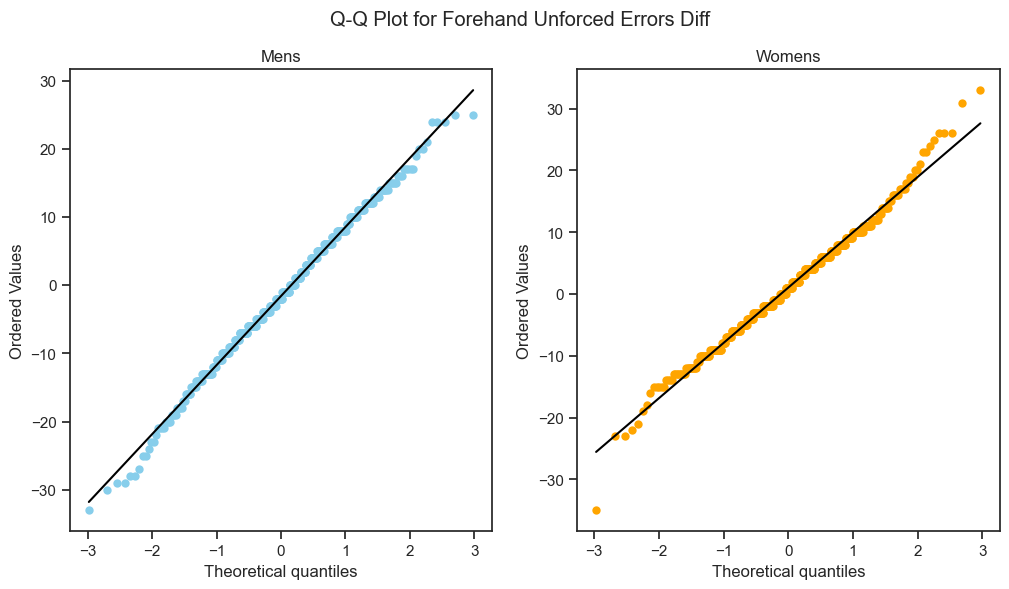

Summary Statistics for Forehand Winners Diff:
+-------------+-------------+------------+
| Statistic   |         Men |      Women |
+=============+=============+============+
| Mean        |   1.52795   |  2.77706   |
+-------------+-------------+------------+
| Variance    | 120.146     | 79.2192    |
+-------------+-------------+------------+
| Skewness    |   0.0316108 | -0.0440602 |
+-------------+-------------+------------+
| Kurtosis    |   0.877923  |  0.651453  |
+-------------+-------------+------------+
Statistical Tests for Forehand Winners Diff:
+-------------------------+----------------+------------+
| Test                    |      Statistic |    P-value |
+=========================+================+============+
| KS-test (Distribution)  |      0.0788632 | 0.0988889  |
+-------------------------+----------------+------------+
| T-test (Means)          |     -1.91813   | 0.0553964  |
+-------------------------+----------------+------------+
| Mann-Whitney U          | 10

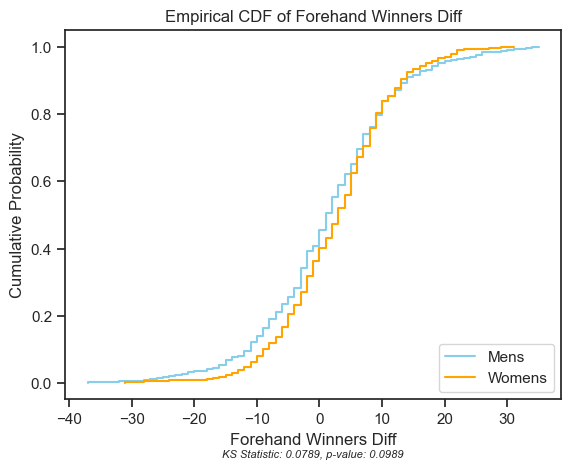

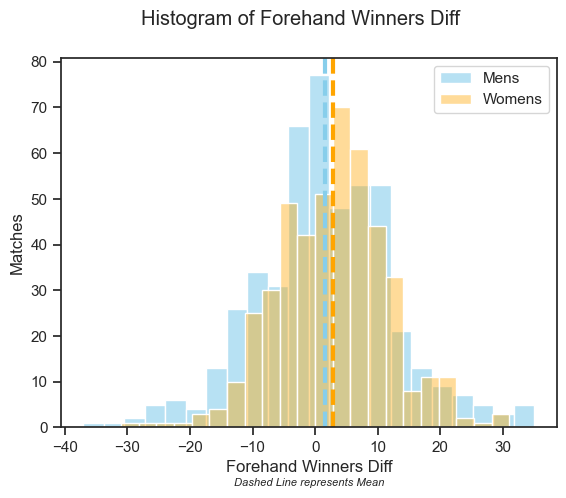

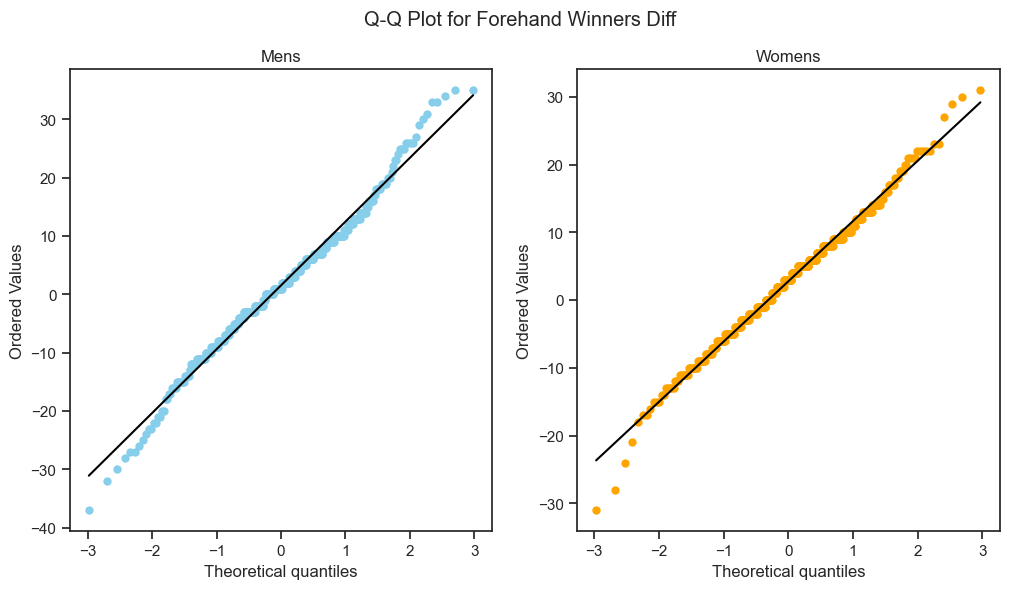

Summary Statistics for Games Won Diff:
+-------------+-----------+-----------+
| Statistic   |       Men |     Women |
+=============+===========+===========+
| Mean        |  2.9234   |  2.07792  |
+-------------+-----------+-----------+
| Variance    | 45.2701   | 31.226    |
+-------------+-----------+-----------+
| Skewness    | -0.496426 | -0.413215 |
+-------------+-----------+-----------+
| Kurtosis    | -0.869075 | -1.0894   |
+-------------+-----------+-----------+
Statistical Tests for Games Won Diff:
+-------------------------+--------------+-------------+
| Test                    |    Statistic |     P-value |
+=========================+==============+=============+
| KS-test (Distribution)  |      0.1278  | 0.000787981 |
+-------------------------+--------------+-------------+
| T-test (Means)          |      2.09647 | 0.0363067   |
+-------------------------+--------------+-------------+
| Mann-Whitney U          | 123852       | 0.00336128  |
+-------------------------+

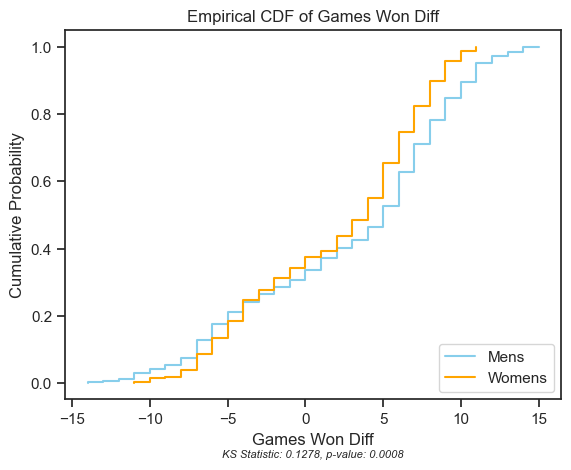

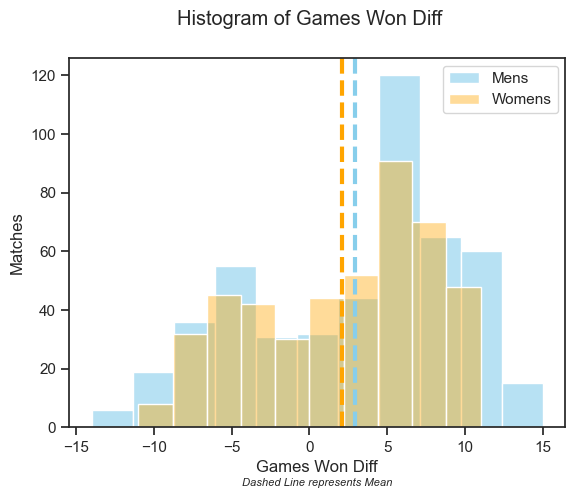

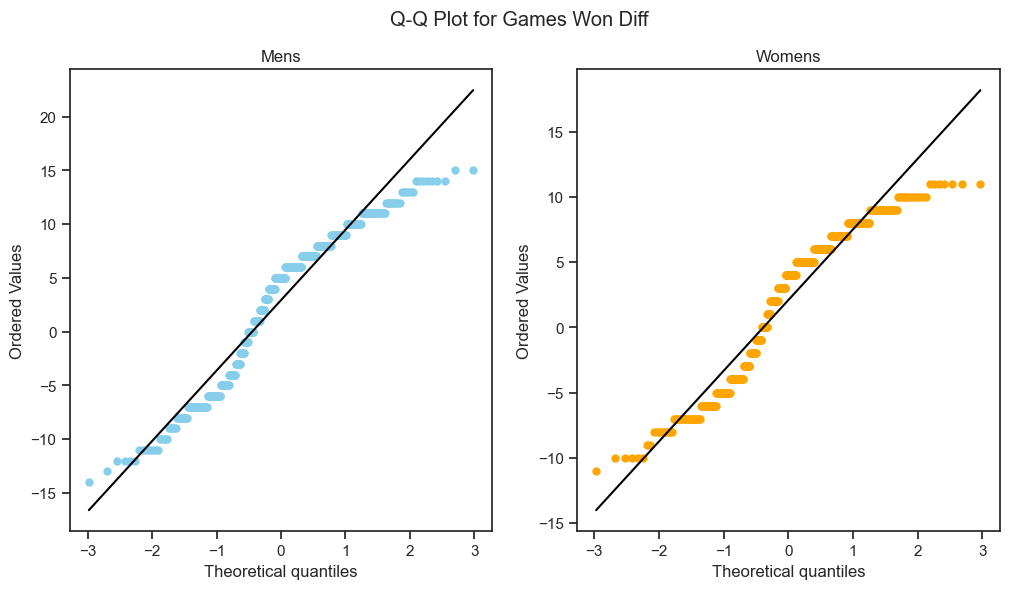

Summary Statistics for Groundstroke Errors Diff:
+-------------+-------------+-----------+
| Statistic   |         Men |     Women |
+=============+=============+===========+
| Mean        |  -2.53002   | -2.16883  |
+-------------+-------------+-----------+
| Variance    | 109.262     | 60.6916   |
+-------------+-------------+-----------+
| Skewness    |   0.149835  |  0.239529 |
+-------------+-------------+-----------+
| Kurtosis    |   0.0171265 |  0.1306   |
+-------------+-------------+-----------+
Statistical Tests for Groundstroke Errors Diff:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.105872 | 0.00911141  |
+-------------------------+---------------+-------------+
| T-test (Means)          |     -0.600186 | 0.548526    |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 108759 

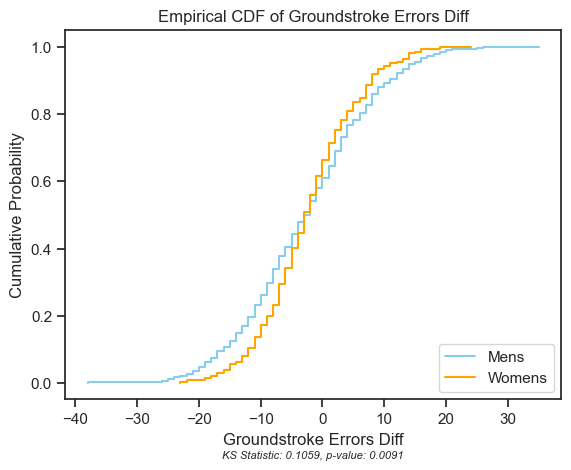

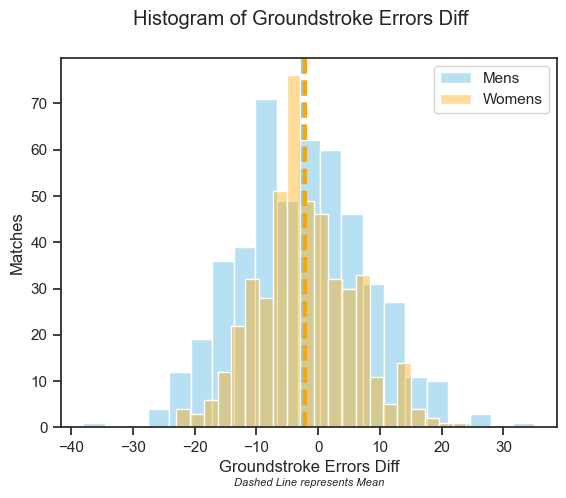

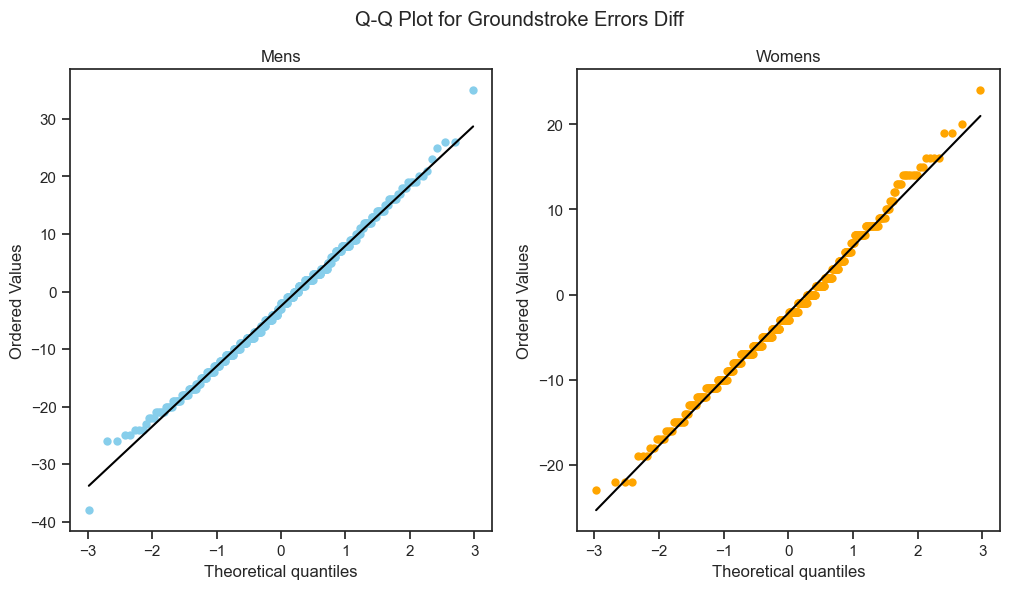

Summary Statistics for Groundstroke Unforced Errors Diff:
+-------------+-------------+------------+
| Statistic   |         Men |      Women |
+=============+=============+============+
| Mean        |  -2.41615   |   1.05844  |
+-------------+-------------+------------+
| Variance    | 210.629     | 176.697    |
+-------------+-------------+------------+
| Skewness    |  -0.128546  |   0.183199 |
+-------------+-------------+------------+
| Kurtosis    |   0.0650109 |   0.150044 |
+-------------+-------------+------------+
Statistical Tests for Groundstroke Unforced Errors Diff:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |     0.0974967 | 0.0205589   |
+-------------------------+---------------+-------------+
| T-test (Means)          |    -3.83297   | 0.000135    |
+-------------------------+---------------+-------------+
| Mann

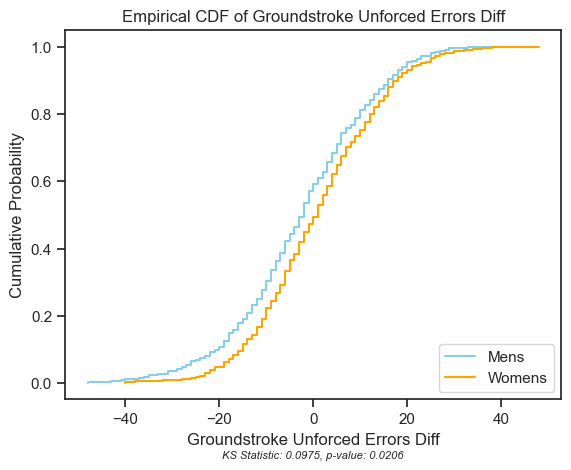

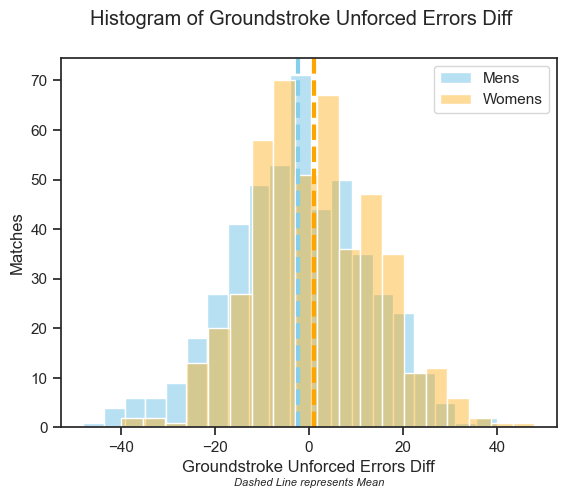

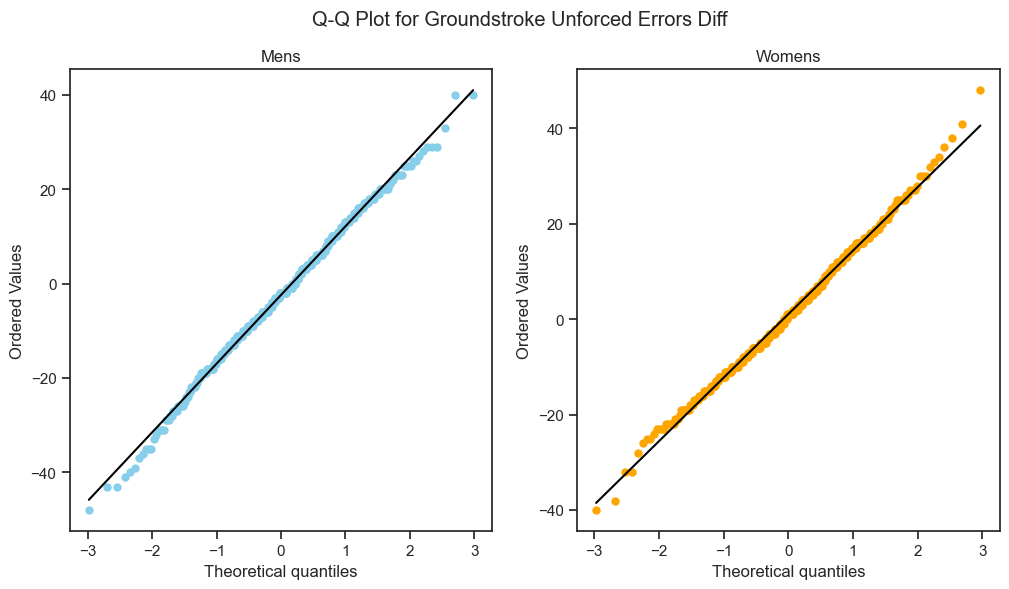

Summary Statistics for Groundstroke Winners Diff:
+-------------+-------------+------------+
| Statistic   |         Men |      Women |
+=============+=============+============+
| Mean        |   1.80124   |   3.54329  |
+-------------+-------------+------------+
| Variance    | 151.131     | 107.025    |
+-------------+-------------+------------+
| Skewness    |   0.0707644 |  -0.23705  |
+-------------+-------------+------------+
| Kurtosis    |   0.626019  |   0.669012 |
+-------------+-------------+------------+
Statistical Tests for Groundstroke Winners Diff:
+-------------------------+---------------+------------+
| Test                    |     Statistic |    P-value |
+=========================+===============+============+
| KS-test (Distribution)  |     0.0992848 | 0.0173776  |
+-------------------------+---------------+------------+
| T-test (Means)          |    -2.35173   | 0.018891   |
+-------------------------+---------------+------------+
| Mann-Whitney U          | 9

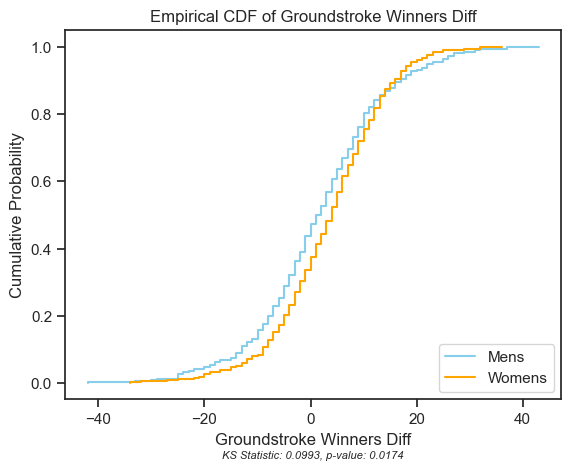

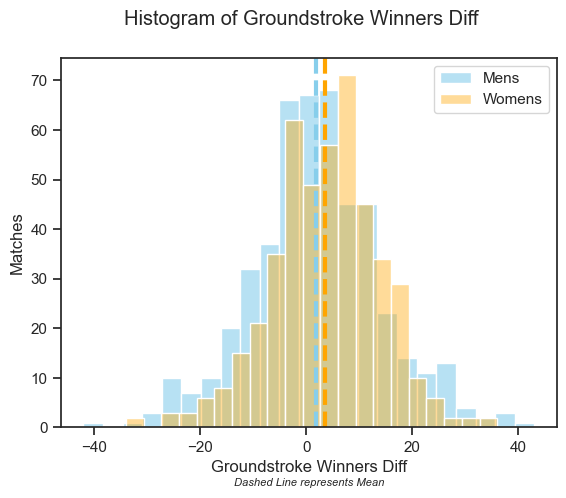

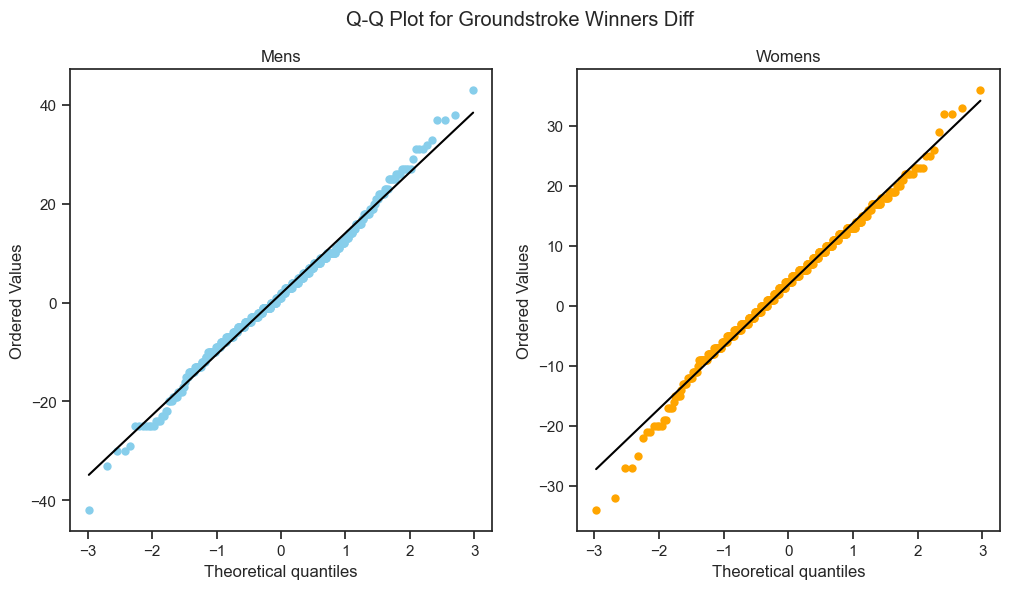

Summary Statistics for Max Games In A Row Diff:
+-------------+------------+-----------+
| Statistic   |        Men |     Women |
+=============+============+===========+
| Mean        |  1.09731   |  1.01515  |
+-------------+------------+-----------+
| Variance    |  8.00088   |  9.71994  |
+-------------+------------+-----------+
| Skewness    | -0.0863761 | -0.063539 |
+-------------+------------+-----------+
| Kurtosis    |  0.831394  |  0.247247 |
+-------------+------------+-----------+
Statistical Tests for Max Games In A Row Diff:
+-------------------------+----------------+-----------+
| Test                    |      Statistic |   P-value |
+=========================+================+===========+
| KS-test (Distribution)  |      0.0447017 | 0.709823  |
+-------------------------+----------------+-----------+
| T-test (Means)          |      0.424586  | 0.671235  |
+-------------------------+----------------+-----------+
| Mann-Whitney U          | 113764         | 0.598951  

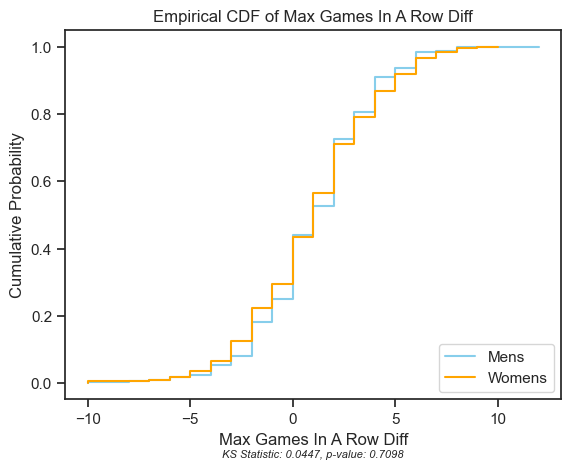

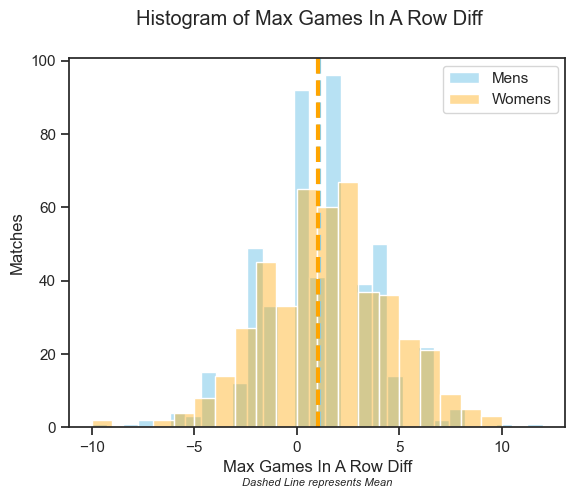

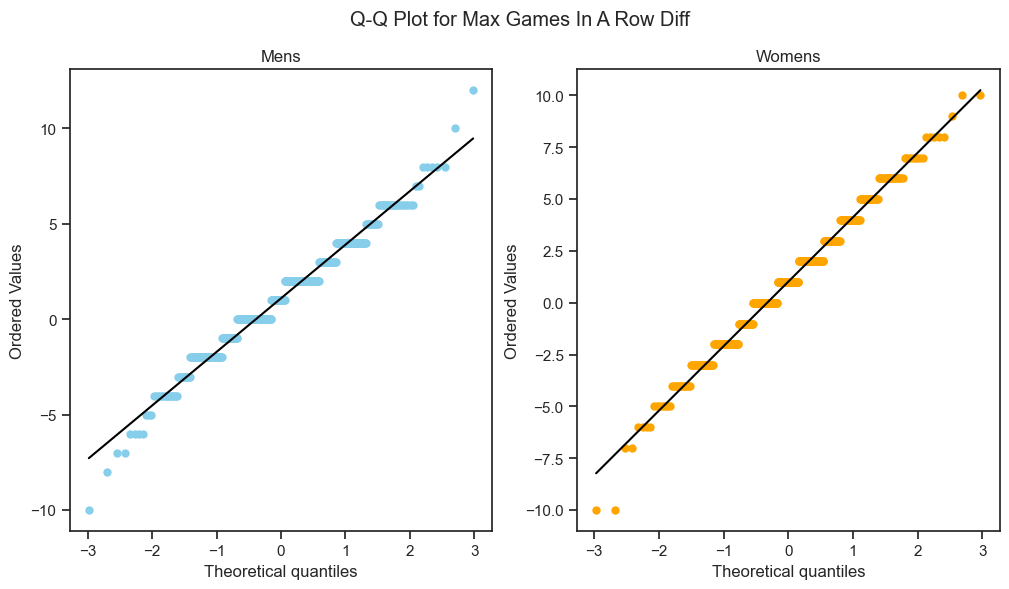

Summary Statistics for Max Points In A Row Diff:
+-------------+-----------+-----------+
| Statistic   |       Men |     Women |
+=============+===========+===========+
| Mean        | 1.09317   |  0.917749 |
+-------------+-----------+-----------+
| Variance    | 9.09296   | 10.6266   |
+-------------+-----------+-----------+
| Skewness    | 0.0751073 |  0.166313 |
+-------------+-----------+-----------+
| Kurtosis    | 1.29179   |  1.04306  |
+-------------+-----------+-----------+
Statistical Tests for Max Points In A Row Diff:
+-------------------------+----------------+-----------+
| Test                    |      Statistic |   P-value |
+=========================+================+===========+
| KS-test (Distribution)  |      0.0656879 |  0.245655 |
+-------------------------+----------------+-----------+
| T-test (Means)          |      0.859206  |  0.390445 |
+-------------------------+----------------+-----------+
| Mann-Whitney U          | 114746         |  0.446863 |
+------

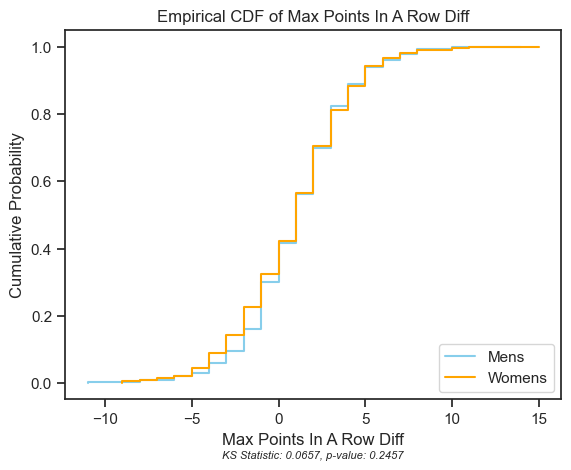

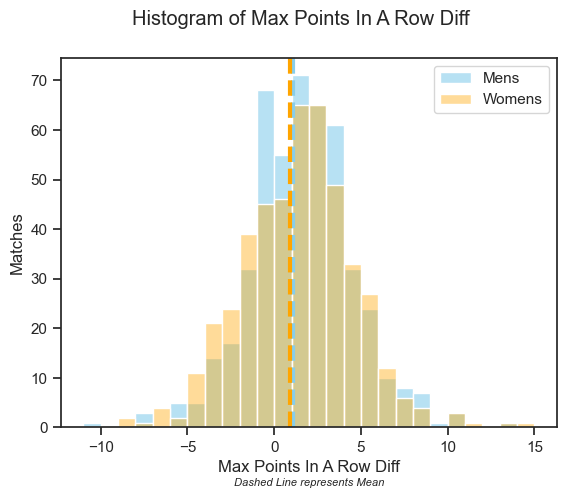

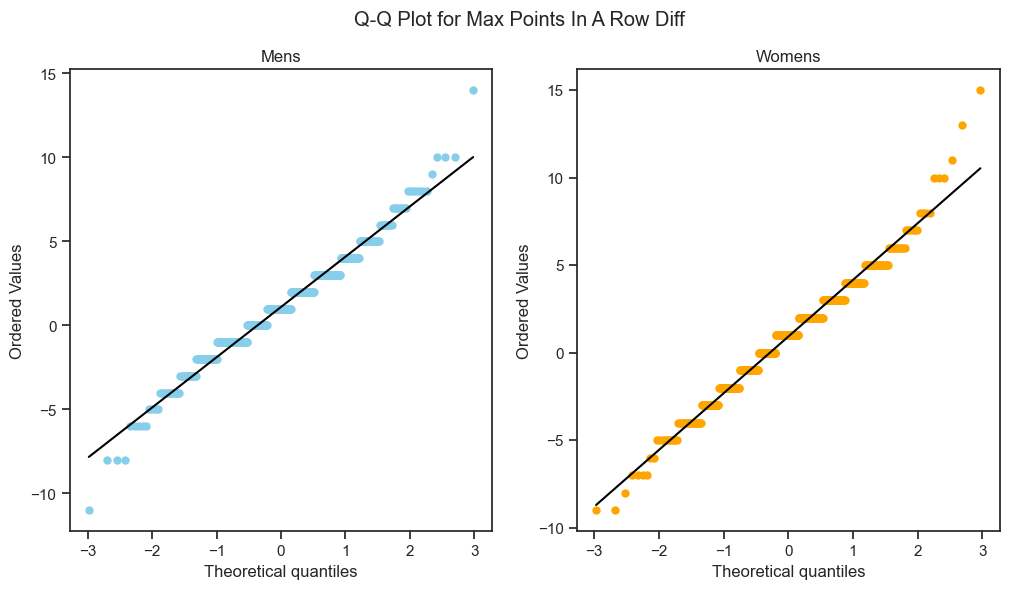

Summary Statistics for Overhead Stroke Winners Diff:
+-------------+-----------+----------+
| Statistic   |       Men |    Women |
+=============+===========+==========+
| Mean        | 0.0993789 | 0.136364 |
+-------------+-----------+----------+
| Variance    | 2.87807   | 1.59308  |
+-------------+-----------+----------+
| Skewness    | 0.073987  | 0.42917  |
+-------------+-----------+----------+
| Kurtosis    | 3.91332   | 7.16597  |
+-------------+-----------+----------+
Statistical Tests for Overhead Stroke Winners Diff:
+-------------------------+----------------+-------------+
| Test                    |      Statistic |     P-value |
+=========================+================+=============+
| KS-test (Distribution)  |      0.0742518 | 0.138601    |
+-------------------------+----------------+-------------+
| T-test (Means)          |     -0.378897  | 0.704849    |
+-------------------------+----------------+-------------+
| Mann-Whitney U          | 109464         | 0.576307

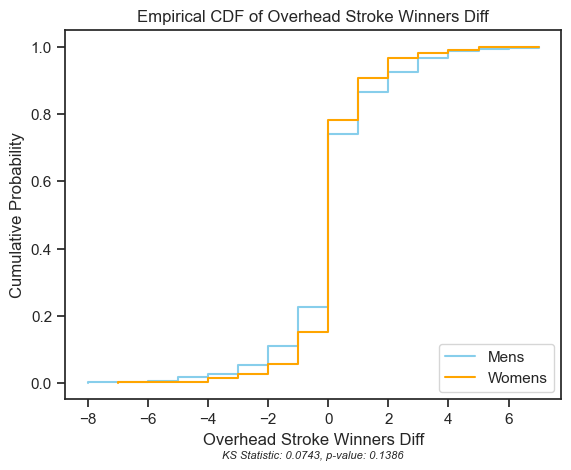

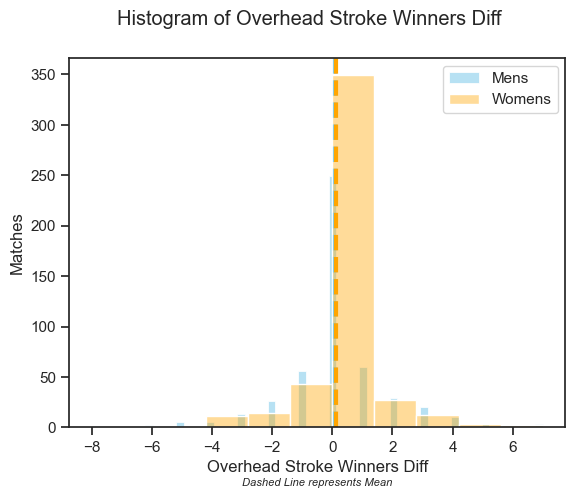

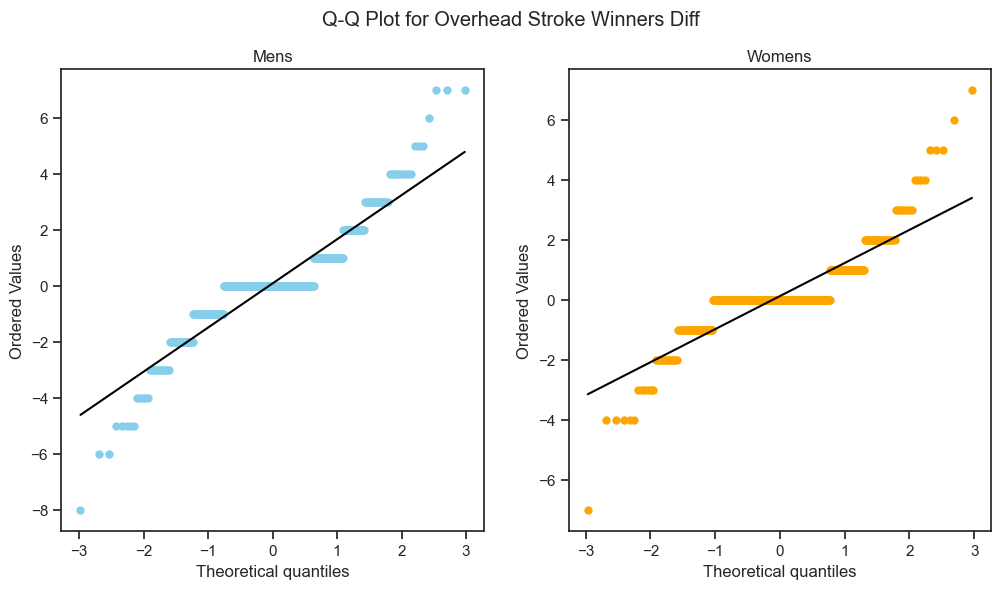

Summary Statistics for Points Won Diff:
+-------------+------------+------------+
| Statistic   |        Men |      Women |
+=============+============+============+
| Mean        |   8.94824  |   6.07576  |
+-------------+------------+------------+
| Variance    | 376.468    | 238.495    |
+-------------+------------+------------+
| Skewness    |  -0.509519 |  -0.417963 |
+-------------+------------+------------+
| Kurtosis    |  -0.866911 |  -1.03755  |
+-------------+------------+------------+
Statistical Tests for Points Won Diff:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.195652 | 2.14797e-08 |
+-------------------------+---------------+-------------+
| T-test (Means)          |      2.51098  | 0.0122058   |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 127062        | 0.0002209

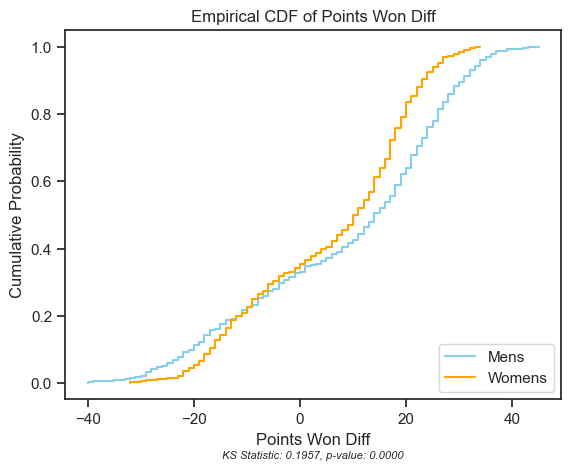

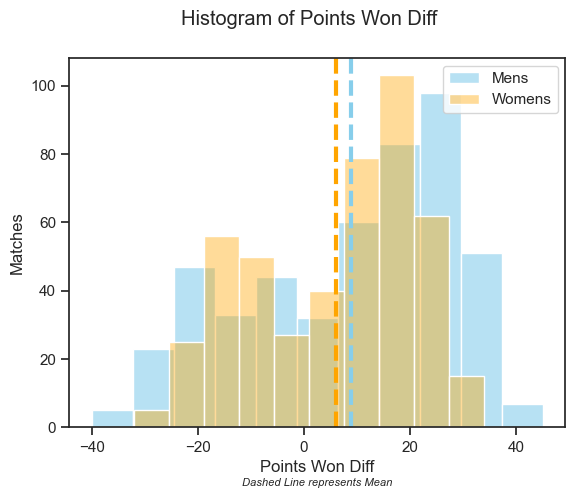

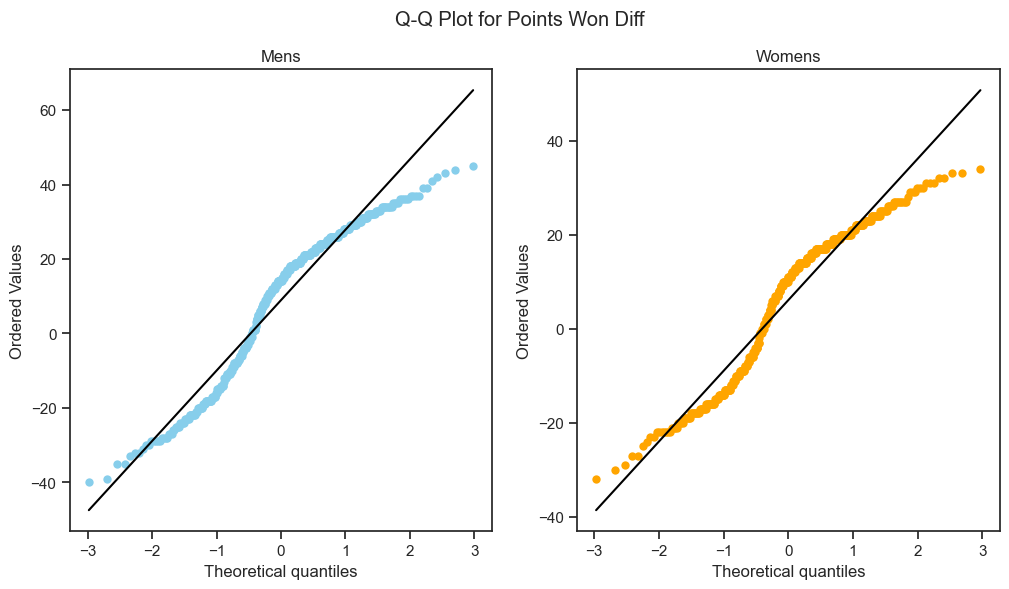

Summary Statistics for Points Won From Last 10 Diff:
+-------------+-----------+-----------+
| Statistic   |       Men |     Women |
+=============+===========+===========+
| Mean        |  1        |  1.01299  |
+-------------+-----------+-----------+
| Variance    | 14.5685   | 16.7243   |
+-------------+-----------+-----------+
| Skewness    | -0.356088 | -0.244044 |
+-------------+-----------+-----------+
| Kurtosis    | -0.481681 | -0.609488 |
+-------------+-----------+-----------+
Statistical Tests for Points Won From Last 10 Diff:
+-------------------------+----------------+-----------+
| Test                    |      Statistic |   P-value |
+=========================+================+===========+
| KS-test (Distribution)  |      0.0269151 |  0.993172 |
+-------------------------+----------------+-----------+
| T-test (Means)          |     -0.050491  |  0.959742 |
+-------------------------+----------------+-----------+
| Mann-Whitney U          | 111258         |  0.939647 |

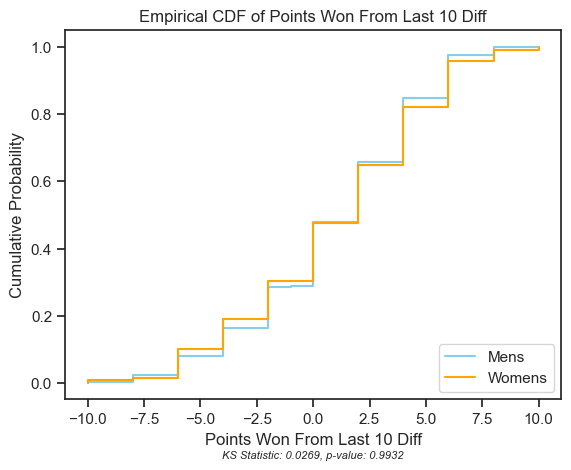

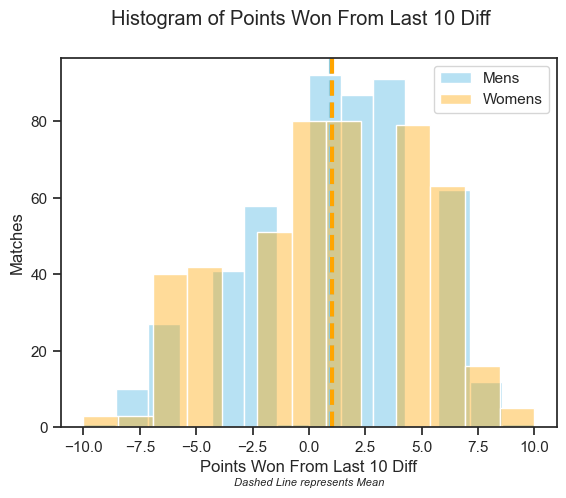

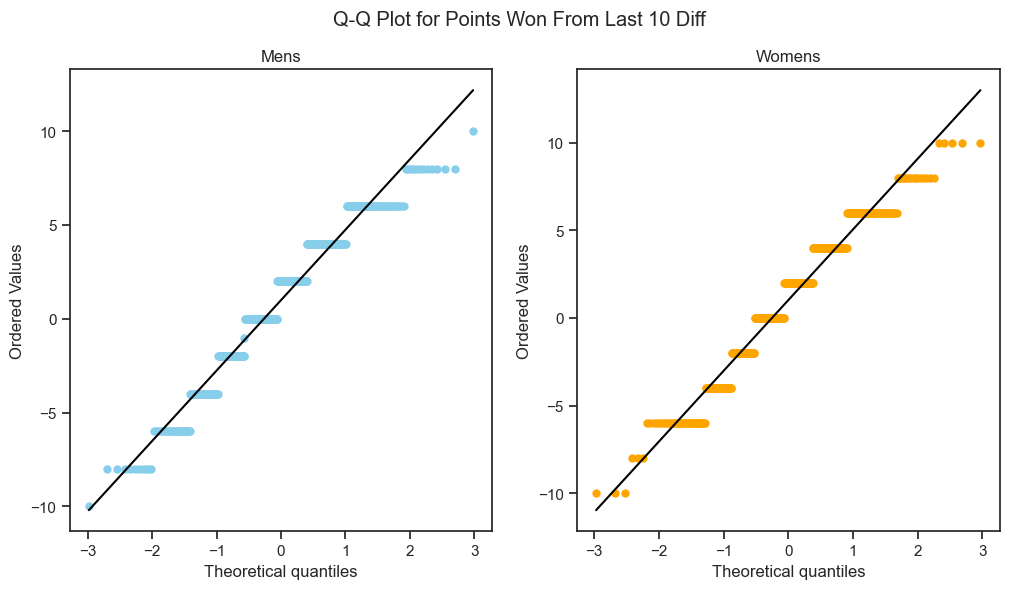

Summary Statistics for Second Serve Points Won Diff:
+-------------+------------+-----------+
| Statistic   |        Men |     Women |
+=============+============+===========+
| Mean        |  0.322981  |  1.08009  |
+-------------+------------+-----------+
| Variance    | 51.3477    | 30.4816   |
+-------------+------------+-----------+
| Skewness    | -0.0822466 | -0.126473 |
+-------------+------------+-----------+
| Kurtosis    | -0.0276144 |  0.395777 |
+-------------+------------+-----------+
Statistical Tests for Second Serve Points Won Diff:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.120459 | 0.00188211  |
+-------------------------+---------------+-------------+
| T-test (Means)          |     -1.8137   | 0.0700416   |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 104258    

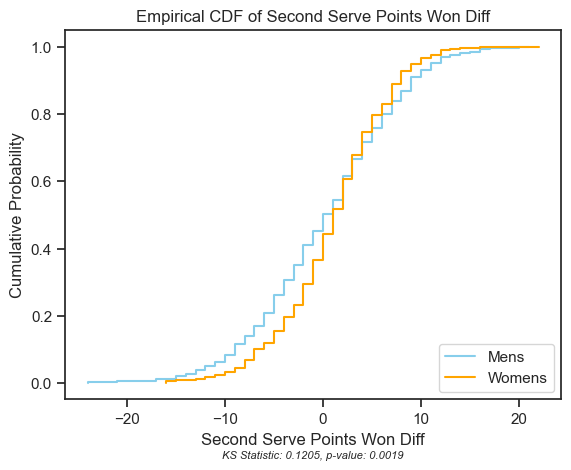

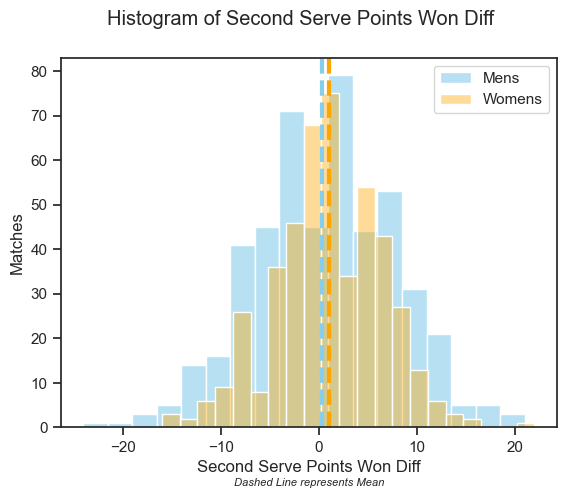

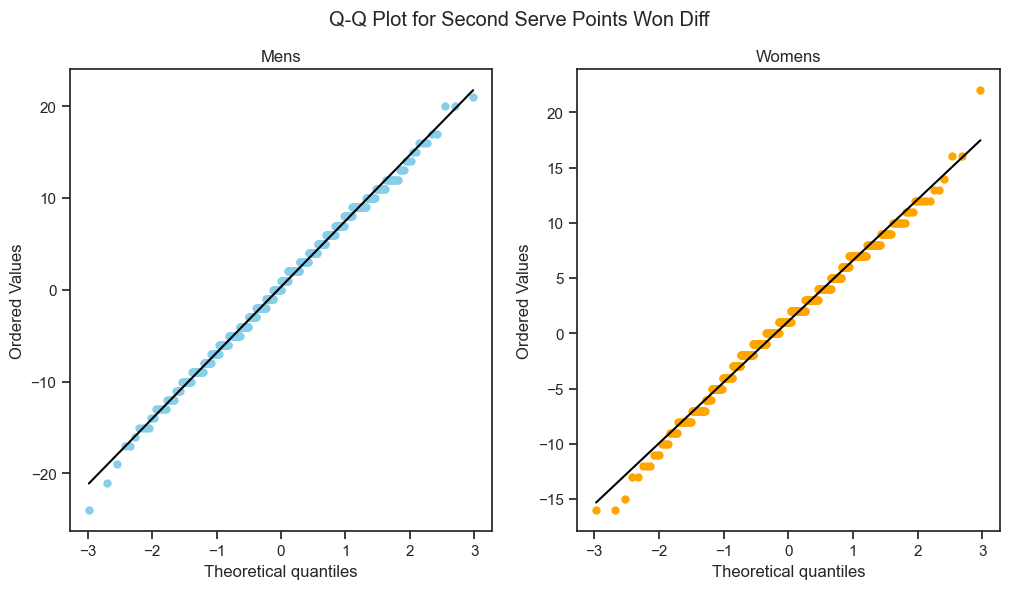

Summary Statistics for Second Serve Successful Diff:
+-------------+--------------+------------+
| Statistic   |          Men |      Women |
+=============+==============+============+
| Mean        |  -2.06418    |  0.454545  |
+-------------+--------------+------------+
| Variance    | 107.566      | 72.9903    |
+-------------+--------------+------------+
| Skewness    |   0.00601689 |  0.0356948 |
+-------------+--------------+------------+
| Kurtosis    |  -0.290701   |  0.955844  |
+-------------+--------------+------------+
Statistical Tests for Second Serve Successful Diff:
+-------------------------+--------------+-------------+
| Test                    |    Statistic |     P-value |
+=========================+==============+=============+
| KS-test (Distribution)  |     0.170713 | 1.71852e-06 |
+-------------------------+--------------+-------------+
| T-test (Means)          |    -4.06484  | 5.20703e-05 |
+-------------------------+--------------+-------------+
| Mann-Whitn

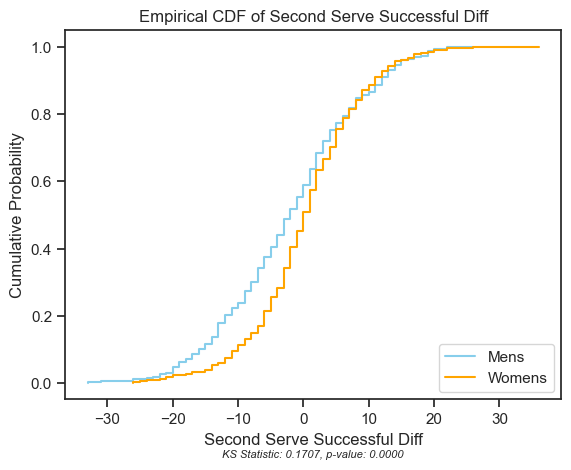

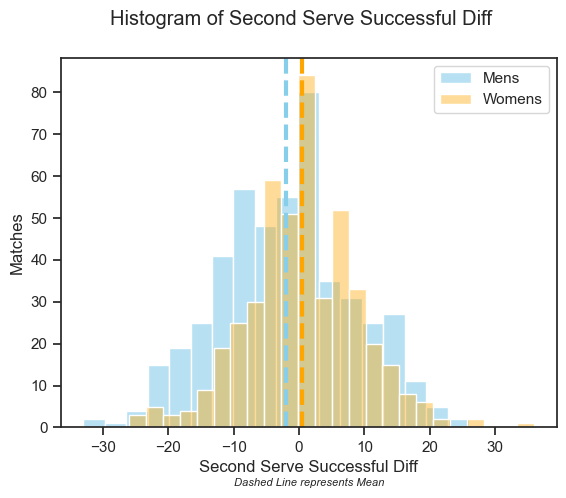

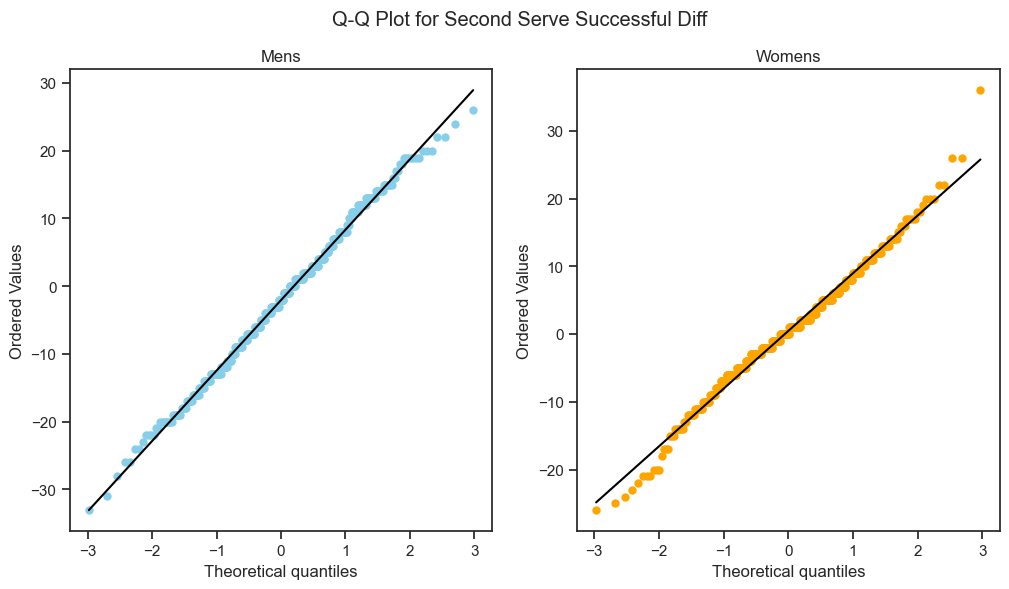

Summary Statistics for Service Games Won Diff:
+-------------+-----------+-----------+
| Statistic   |       Men |     Women |
+=============+===========+===========+
| Mean        |  1.45549  |  1.08009  |
+-------------+-----------+-----------+
| Variance    | 12.0701   |  8.30377  |
+-------------+-----------+-----------+
| Skewness    | -0.469481 | -0.409561 |
+-------------+-----------+-----------+
| Kurtosis    | -0.848648 | -0.99241  |
+-------------+-----------+-----------+
Statistical Tests for Service Games Won Diff:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.114248 | 0.00377656  |
+-------------------------+---------------+-------------+
| T-test (Means)          |      1.80368  | 0.0716009   |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 122316        | 0.00999874  |
+--

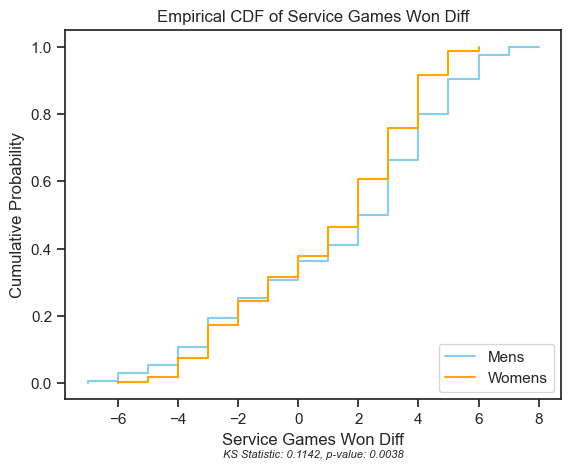

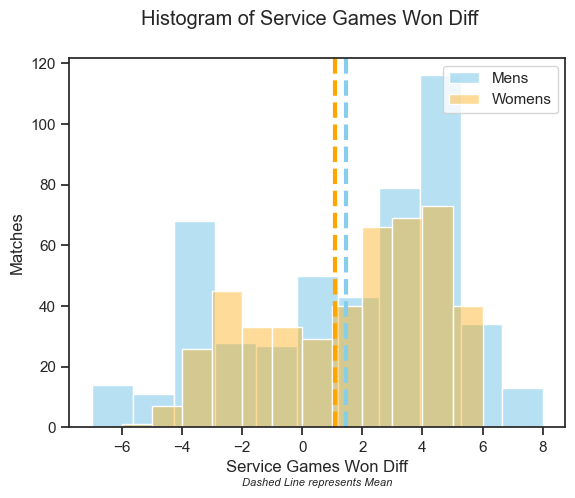

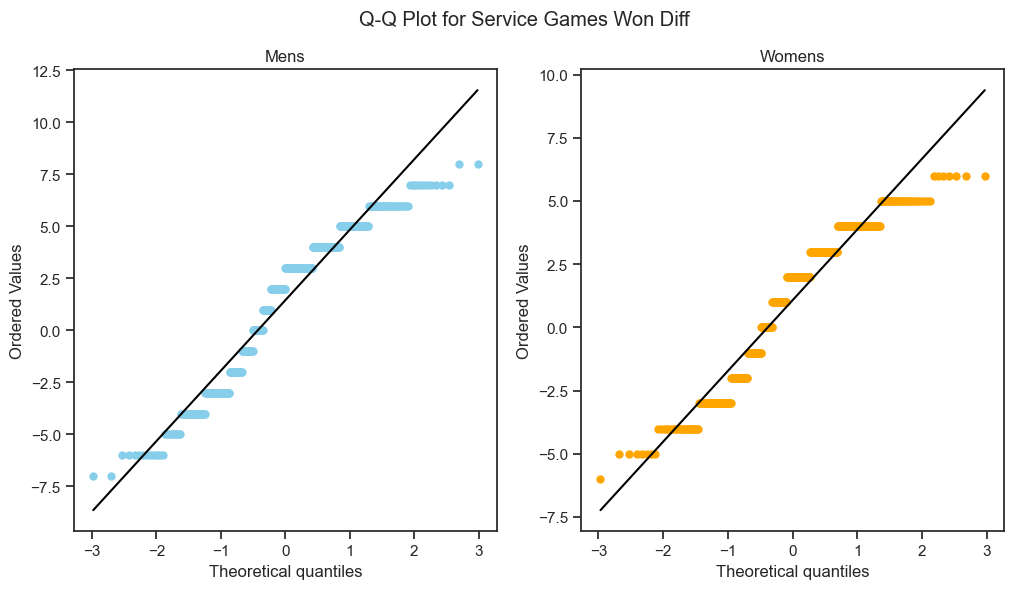

Summary Statistics for Service Points Lost Diff:
+-------------+------------+------------+
| Statistic   |        Men |      Women |
+=============+============+============+
| Mean        |  -6.71843  |  -3.49784  |
+-------------+------------+------------+
| Variance    | 223.29     | 114.537    |
+-------------+------------+------------+
| Skewness    |   0.324017 |   0.150227 |
+-------------+------------+------------+
| Kurtosis    |  -0.411604 |  -0.64024  |
+-------------+------------+------------+
Statistical Tests for Service Points Lost Diff:
+-------------------------+--------------+-------------+
| Test                    |    Statistic |     P-value |
+=========================+==============+=============+
| KS-test (Distribution)  |     0.194805 | 2.51766e-08 |
+-------------------------+--------------+-------------+
| T-test (Means)          |    -3.79429  | 0.000157503 |
+-------------------------+--------------+-------------+
| Mann-Whitney U          | 92849.5      |

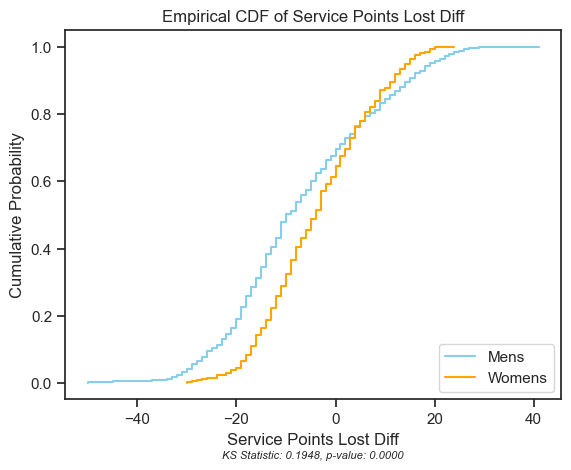

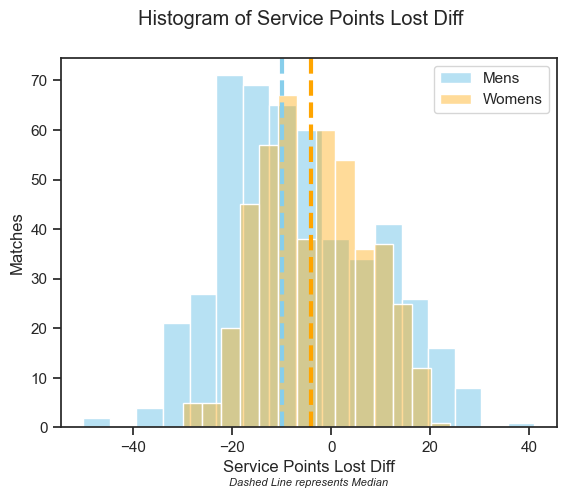

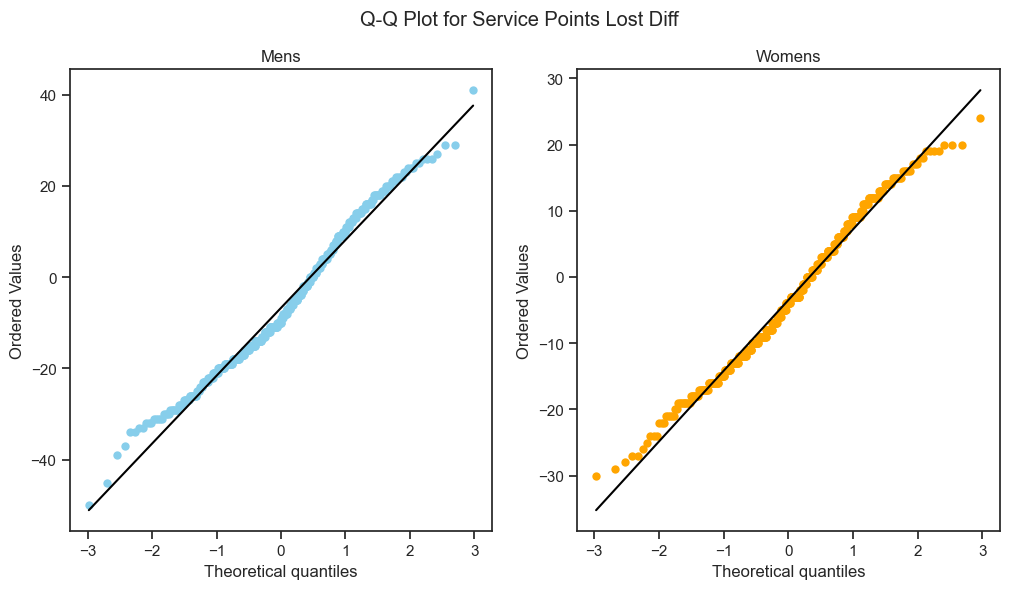

Summary Statistics for Service Points Won Diff:
+-------------+------------+------------+
| Statistic   |        Men |      Women |
+=============+============+============+
| Mean        |   2.15114  |  2.49351   |
+-------------+------------+------------+
| Variance    | 116.261    | 96.5672    |
+-------------+------------+------------+
| Skewness    |  -0.243547 | -0.419596  |
+-------------+------------+------------+
| Kurtosis    |  -0.507868 |  0.0655809 |
+-------------+------------+------------+
Statistical Tests for Service Points Won Diff:
+-------------------------+----------------+-----------+
| Test                    |      Statistic |   P-value |
+=========================+================+===========+
| KS-test (Distribution)  |      0.0502541 | 0.566727  |
+-------------------------+----------------+-----------+
| T-test (Means)          |     -0.509477  | 0.610537  |
+-------------------------+----------------+-----------+
| Mann-Whitney U          | 109744         |

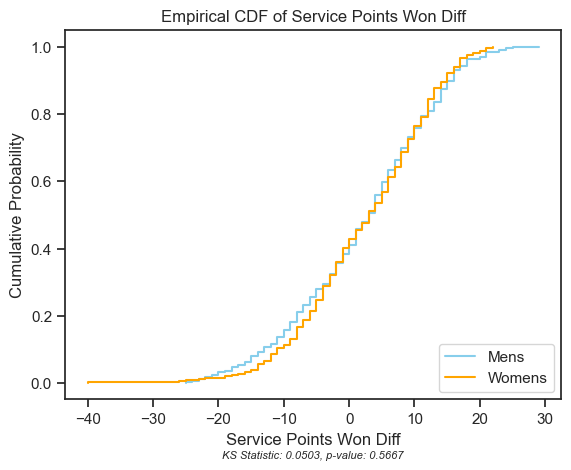

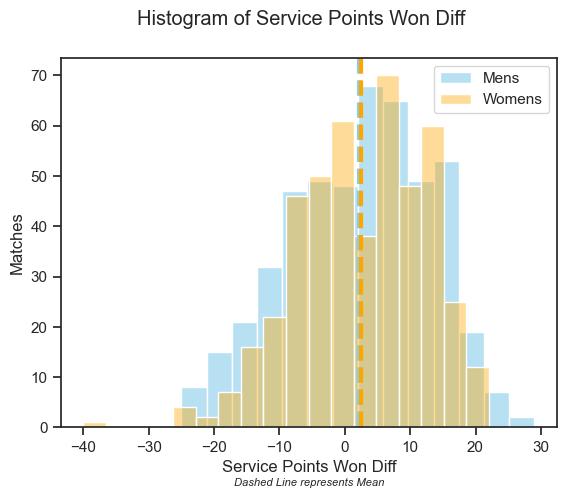

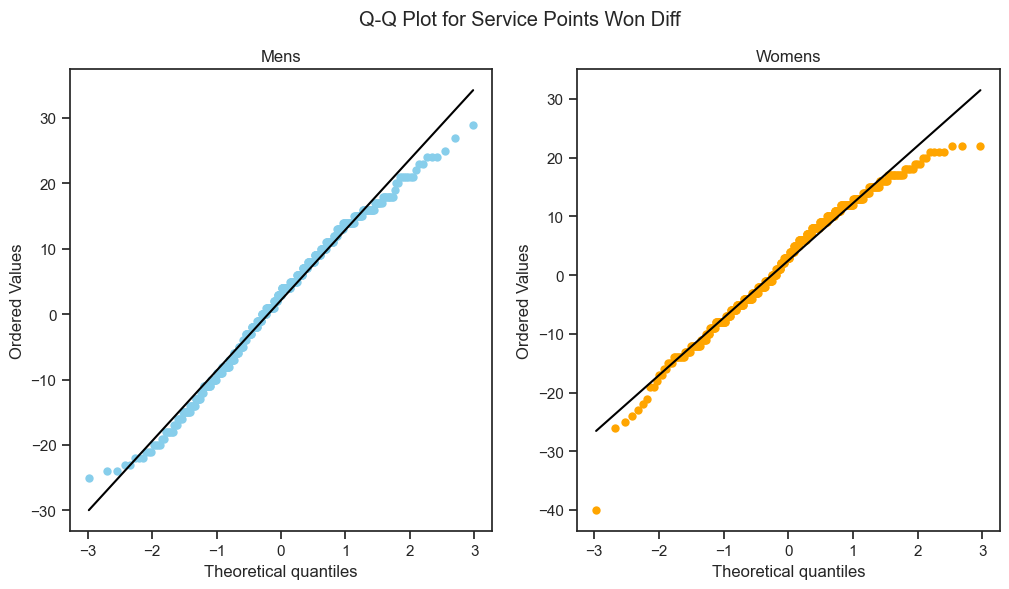

Summary Statistics for Total Breakpoints Diff:
+-------------+-----------+-----------+
| Statistic   |       Men |     Women |
+=============+===========+===========+
| Mean        |  2.94824  |  1.2013   |
+-------------+-----------+-----------+
| Variance    | 49.7131   | 29.0331   |
+-------------+-----------+-----------+
| Skewness    | -0.147679 | -0.41854  |
+-------------+-----------+-----------+
| Kurtosis    | -0.437072 |  0.816941 |
+-------------+-----------+-----------+
Statistical Tests for Total Breakpoints Diff:
+-------------------------+---------------+-------------+
| Test                    |     Statistic |     P-value |
+=========================+===============+=============+
| KS-test (Distribution)  |      0.170996 | 1.6409e-06  |
+-------------------------+---------------+-------------+
| T-test (Means)          |      4.26571  | 2.19358e-05 |
+-------------------------+---------------+-------------+
| Mann-Whitney U          | 129602        | 1.68269e-05 |
+--

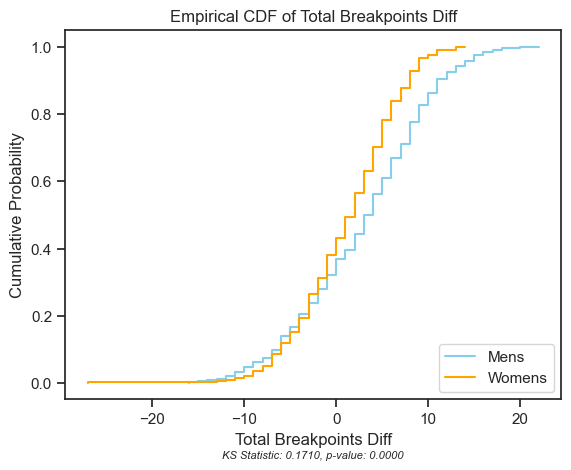

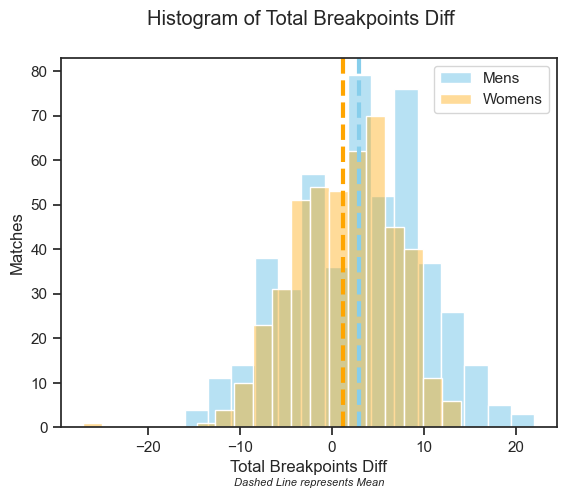

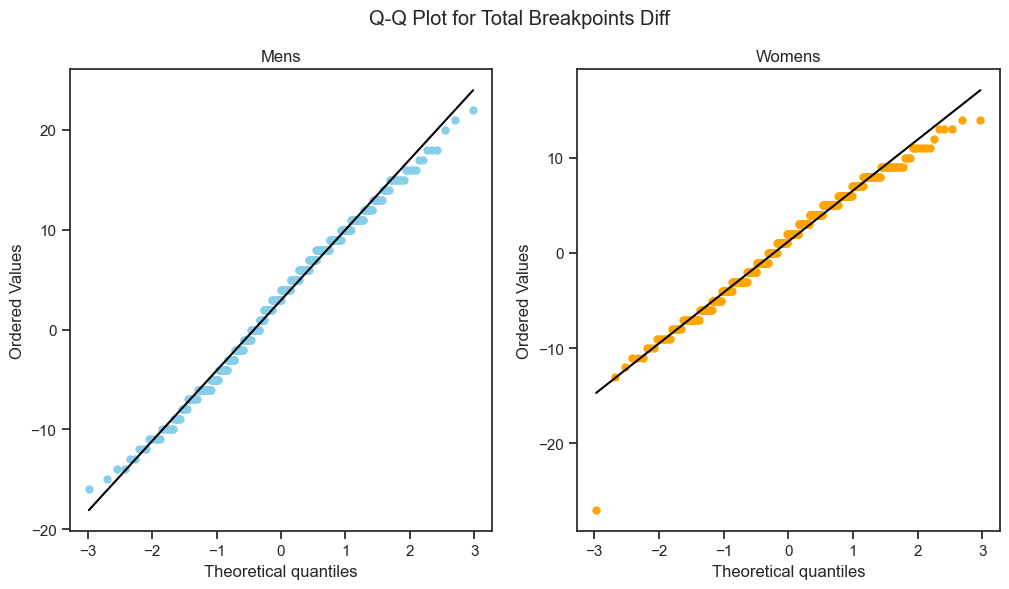

Summary Statistics for Volley Unforced Errors Diff:
+-------------+------------+------------+
| Statistic   |        Men |      Women |
+=============+============+============+
| Mean        | -0.0786749 | -0.0194805 |
+-------------+------------+------------+
| Variance    |  2.09338   |  0.921529  |
+-------------+------------+------------+
| Skewness    | -0.895251  |  0.0388607 |
+-------------+------------+------------+
| Kurtosis    |  5.03827   |  6.44414   |
+-------------+------------+------------+
Statistical Tests for Volley Unforced Errors Diff:
+-------------------------+----------------+-------------+
| Test                    |      Statistic |     P-value |
+=========================+================+=============+
| KS-test (Distribution)  |      0.0653115 | 0.251495    |
+-------------------------+----------------+-------------+
| T-test (Means)          |     -0.737676  | 0.460895    |
+-------------------------+----------------+-------------+
| Mann-Whitney U      

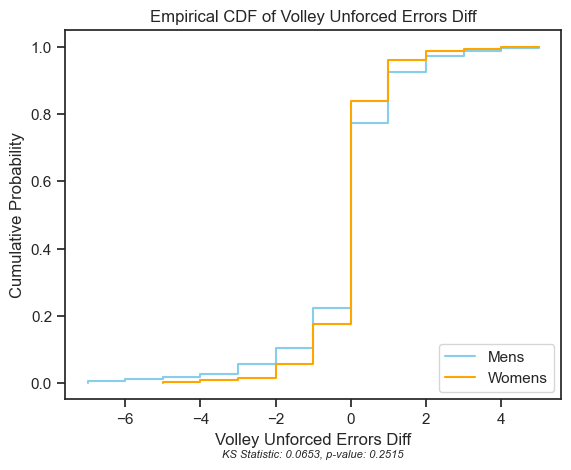

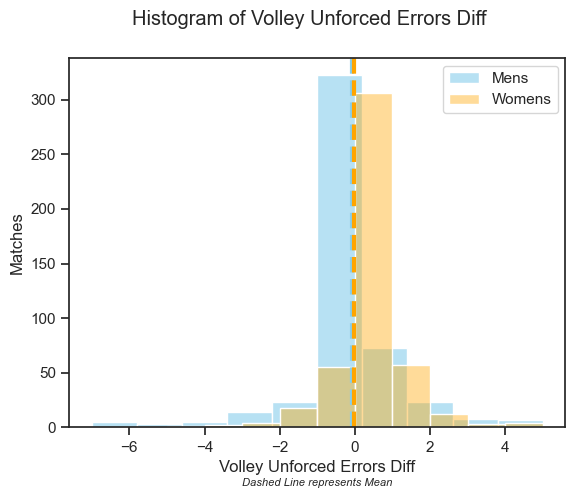

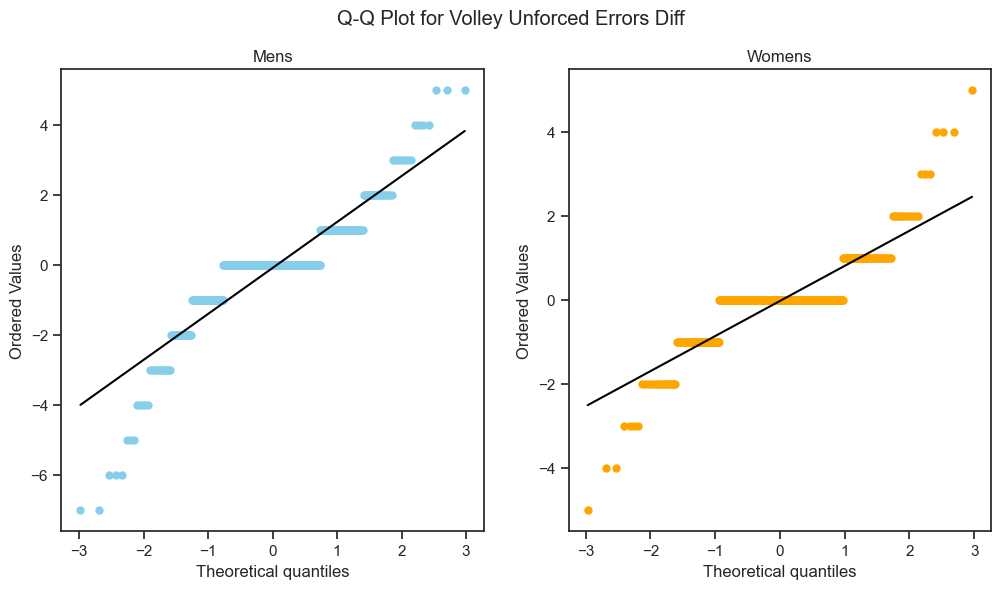

Summary Statistics for Volley Winners Diff:
+-------------+-----------+----------+
| Statistic   |       Men |    Women |
+=============+===========+==========+
| Mean        |  0.186335 | 0.298701 |
+-------------+-----------+----------+
| Variance    | 15.3387   | 6.61774  |
+-------------+-----------+----------+
| Skewness    |  0.276437 | 0.241322 |
+-------------+-----------+----------+
| Kurtosis    |  3.68498  | 6.53355  |
+-------------+-----------+----------+
Statistical Tests for Volley Winners Diff:
+-------------------------+----------------+-------------+
| Test                    |      Statistic |     P-value |
+=========================+================+=============+
| KS-test (Distribution)  |      0.0808395 | 0.0850369   |
+-------------------------+----------------+-------------+
| T-test (Means)          |     -0.518842  | 0.603992    |
+-------------------------+----------------+-------------+
| Mann-Whitney U          | 109229         | 0.565131    |
+-----------

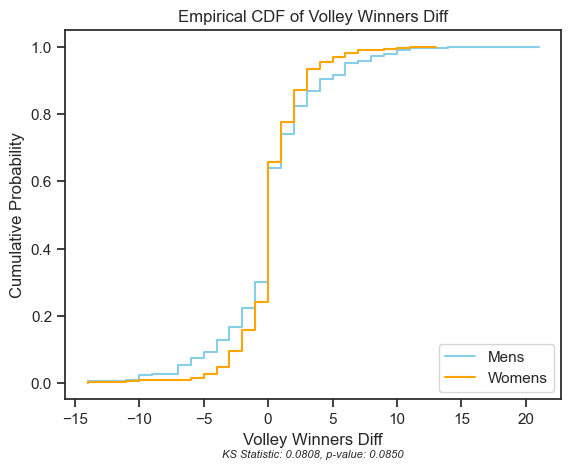

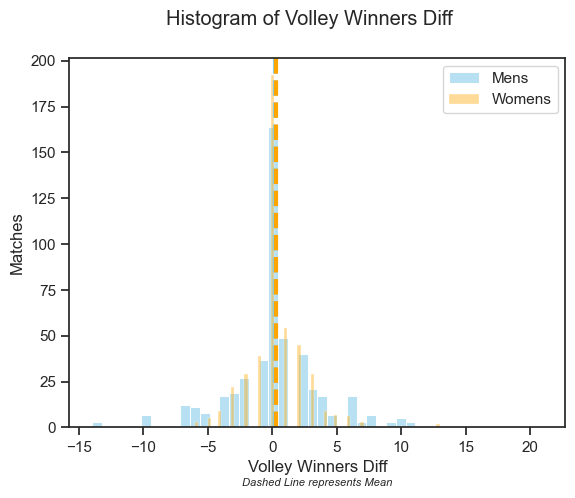

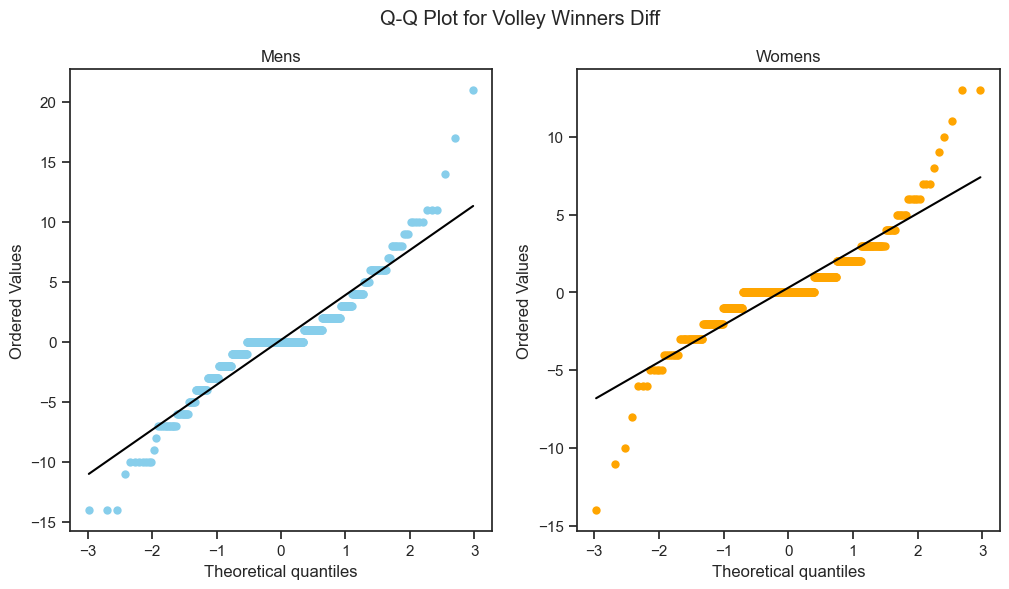

In [103]:
for feature in sorted(features_diff):
    summarize(stats_df,feature)
    plt_ecdf(stats_df, feature)
    plt_dist(stats_df, feature)
    plt_qq(stats_df, feature, "Q-Q Plot for "+feature.replace("_"," ").title())